In [1]:
import seaborn as sns
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import statsmodels.graphics.gofplots as sgg
from statsmodels.stats.anova import anova_lm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df_btc = pd.read_csv('c:/temp/CCC_new/btc-usd.csv', header = 0)

In [3]:
df_bch = pd.read_csv('c:/temp/CCC_new/bch-usd.csv', header = 0)

In [4]:
df_bnb = pd.read_csv('c:/temp/CCC_new/bnb-usd.csv', header = 0)

In [5]:
df_bsv = pd.read_csv('c:/temp/CCC_new/bsv-usd.csv', header = 0)

In [6]:
df_eos = pd.read_csv('c:/temp/CCC_new/eos-usd.csv', header = 0)

In [7]:
df_eth = pd.read_csv('c:/temp/CCC_new/eth-usd.csv', header = 0)

In [8]:
df_ltc = pd.read_csv('c:/temp/CCC_new/ltc-usd.csv', header = 0)

In [9]:
df_xrp = pd.read_csv('c:/temp/CCC_new/xrp-usd.csv', header = 0)

In [10]:
df_xtz = pd.read_csv('c:/temp/CCC_new/xtz-usd.csv', header = 0)

In [11]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2302 non-null   object 
 1   Open       2302 non-null   float64
 2   High       2302 non-null   float64
 3   Low        2302 non-null   float64
 4   Close      2302 non-null   float64
 5   Adj Close  2302 non-null   float64
 6   Volume     2302 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.0+ KB


In [12]:
df_btc.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [13]:
df_btc.tail()

Date          Open          High           Low         Close  \
2297  2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703   
2298  2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2299  2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2300  2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2301  2021-01-04  30253.234375  33407.519531  28722.755859  31155.914063   

         Adj Close       Volume  
2297  29001.720703  46754964848  
2298  29374.152344  40730301359  
2299  32127.267578  67865420765  
2300  32782.023438  78665235202  
2301  31155.914063  82653560832

<AxesSubplot:title={'center':'BTC-USD Close Price Since 9/17/2014'}, xlabel='Date', ylabel='Price (in $)'>

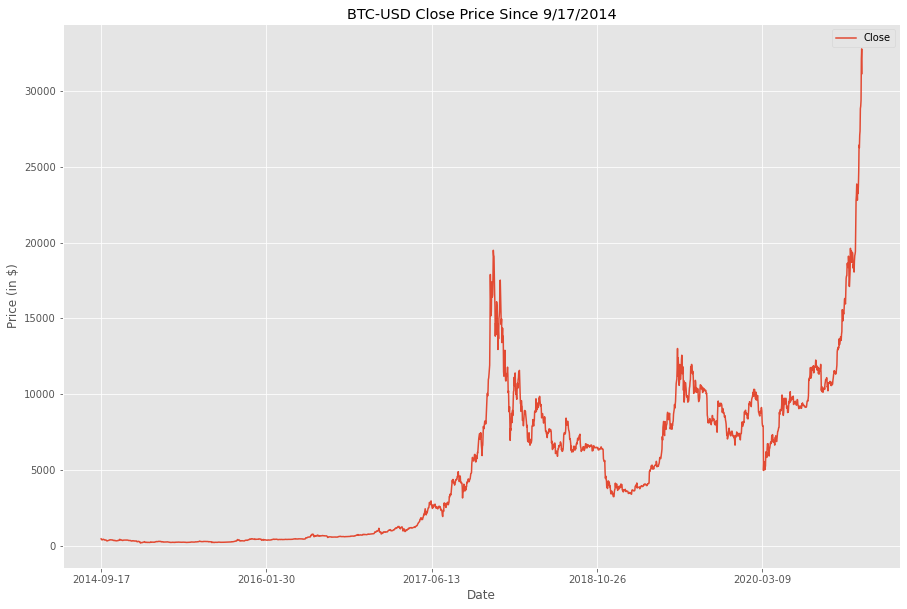

In [14]:
df_btc.plot('Date', 'Close', figsize = (15,10), title = 'BTC-USD Close Price Since 9/17/2014', xlabel = 'Date', ylabel = 'Price (in $)')

In [15]:
df_btc['Volume_Price'] = df_btc['Close'] * df_btc['Volume'] #Volume_Price is the product of Volume and Price for a specific date

In [16]:
df_btc['10_Day_VWAP'] = float('NaN')

In [17]:
for i in range(10, len(df_btc) + 1):
    df_btc['10_Day_VWAP'][i-1] = np.sum(df_btc['Volume_Price'][i-10:i])/np.sum(df_btc['Volume'][i-10:i])
#10-day VWAP is the sum of Volume*Price for each specific day for the past 10 days divided by the sum of Volume for the past 10 days

<ipython-input-17-db1f4227343b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['10_Day_VWAP'][i-1] = np.sum(df_btc['Volume_Price'][i-10:i])/np.sum(df_btc['Volume'][i-10:i])


In [18]:
df_btc['Daily_Return'] = float('NaN')

In [19]:
for i in range(1, len(df_btc)):
    df_btc['Daily_Return'][i] = df_btc['Close'][i]/df_btc['Close'][i-1] - 1
#Daily Return is the percent gain/loss each day compared to the previous day

<ipython-input-19-7e2cb4fb017c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Daily_Return'][i] = df_btc['Close'][i]/df_btc['Close'][i-1] - 1


In [20]:
df_btc['Biweekly_RS'] = float('NaN')

In [21]:
df_btc['Biweekly_RSI'] = float('NaN')

In [22]:
for i in range(13, len(df_btc)):
    daily_gain = 0
    daily_loss = 0
    for j in range(i-13, i+1):
        if df_btc['Daily_Return'][j] >= 0:
            daily_gain += df_btc['Daily_Return'][j]
        else:
            daily_loss += np.abs(df_btc['Daily_Return'][j])
    df_btc['Biweekly_RS'][i] = daily_gain/daily_loss
    daily_gain = 0
    daily_loss = 0
#RS = (Average of Upward Price Change/Average of Downward Price Change)
#the absolute value of the downward price change is applied to the Average of the Downward Price Change to ensure a positive value for RS always

<ipython-input-22-b15556e0893d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Biweekly_RS'][i] = daily_gain/daily_loss


In [23]:
for i in range(13, len(df_btc)):
    df_btc['Biweekly_RSI'][i] = 100 - (100/(1 + df_btc['Biweekly_RS'][i]))
#RSI = 100 – [100/(1 + RS)]
#for Biweekly RSI, the past 14 days are taken into account
#the absolute value of the downward price change is applied to the Average of the Downward Price Change

<ipython-input-23-e89e7b756054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Biweekly_RSI'][i] = 100 - (100/(1 + df_btc['Biweekly_RS'][i]))


In [24]:
df_btc['12_day_EMA'] = float('NaN')
df_btc['26_day_EMA'] = float('NaN')

In [25]:
for i in range(25, len(df_btc)):
    k_12 = 2/(12+1)
    k_26 = 2/(26+1)
    if i == 25:
        df_btc['12_day_EMA'][i] = np.sum(df_btc['Close'][i-11:i+1])/12
        df_btc['26_day_EMA'][i] = np.sum(df_btc['Close'][i-25:i+1])/26
    else:
        df_btc['12_day_EMA'][i] = df_btc['Close'][i] * k_12 + df_btc['12_day_EMA'][i-1] * (1 - k_12)
        df_btc['26_day_EMA'][i] = df_btc['Close'][i] * k_26 + df_btc['12_day_EMA'][i-1] * (1 - k_26)
#12-day EMA - 26-day EMA = MACD
#After calculating basic 12-day MA and 26-day MA for initial calculations, 
#subsequent calculations of EMA consist of Price(today) * k + EMA(yesterday) * (1 - k), 
#with k = 2/(N + 1) and N = # of days in EMA = 12
#For 26-day EMA, N = 26 instead

<ipython-input-25-2ee7e6c3a2a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['12_day_EMA'][i] = np.sum(df_btc['Close'][i-11:i+1])/12
<ipython-input-25-2ee7e6c3a2a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['26_day_EMA'][i] = np.sum(df_btc['Close'][i-25:i+1])/26
<ipython-input-25-2ee7e6c3a2a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['12_day_EMA'][i] = df_btc['Close'][i] * k_12 + df_btc['12_day_E

In [26]:
df_btc['MACD'] = df_btc['12_day_EMA'] - df_btc['26_day_EMA']

In [27]:
df_btc['Signal'] = float('NaN')

In [28]:
for i in range(33, len(df_btc)):
    k_9 = 2/(9+1)
    if i == 33:
        df_btc['Signal'][i] = np.sum(df_btc['MACD'][i-8:i+1])/9
    else:
        df_btc['Signal'][i] = df_btc['MACD'][i] * k_9 + df_btc['MACD'][i-1] * (1 - k_9)

<ipython-input-28-dee7a3f690e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Signal'][i] = np.sum(df_btc['MACD'][i-8:i+1])/9
<ipython-input-28-dee7a3f690e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Signal'][i] = df_btc['MACD'][i] * k_9 + df_btc['MACD'][i-1] * (1 - k_9)


In [29]:
df_btc['Trend_Analysis_Close'] = float('NaN')

In [30]:
for i in range(3, len(df_btc)):
    if df_btc['Close'][i] > df_btc['Close'][i-2] and df_btc['Close'][i-1] > df_btc['Close'][i-3]:
        df_btc['Trend_Analysis_Close'][i] = 'UPTREND'
    elif df_btc['Close'][i] < df_btc['Close'][i-2] and df_btc['Close'][i-1] < df_btc['Close'][i-3]:
        df_btc['Trend_Analysis_Close'][i] = 'DOWNTREND'
    else:
        df_btc['Trend_Analysis_Close'][i] = 'N/A'

<ipython-input-30-ed5cd42eae98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Trend_Analysis_Close'][i] = 'DOWNTREND'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-30-ed5cd42eae98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['Trend_Analysis_Close'][i] = 'N/A'
<ipython-input-30-ed5cd42ea

In [31]:
len(df_btc)

2302

In [32]:
df_bch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1262 non-null   object 
 1   Open       1262 non-null   float64
 2   High       1262 non-null   float64
 3   Low        1262 non-null   float64
 4   Close      1262 non-null   float64
 5   Adj Close  1262 non-null   float64
 6   Volume     1262 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.1+ KB


In [33]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [34]:
df_bsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       213 non-null    float64
 2   High       213 non-null    float64
 3   Low        213 non-null    float64
 4   Close      213 non-null    float64
 5   Adj Close  213 non-null    float64
 6   Volume     213 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.4+ KB


In [35]:
df_eos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1284 non-null   object 
 1   Open       1284 non-null   float64
 2   High       1284 non-null   float64
 3   Low        1284 non-null   float64
 4   Close      1284 non-null   float64
 5   Adj Close  1284 non-null   float64
 6   Volume     1284 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 70.3+ KB


In [36]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1978 non-null   object 
 1   Open       1978 non-null   float64
 2   High       1978 non-null   float64
 3   Low        1978 non-null   float64
 4   Close      1978 non-null   float64
 5   Adj Close  1978 non-null   float64
 6   Volume     1978 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.3+ KB


In [37]:
df_ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2302 non-null   object 
 1   Open       2302 non-null   float64
 2   High       2302 non-null   float64
 3   Low        2302 non-null   float64
 4   Close      2302 non-null   float64
 5   Adj Close  2302 non-null   float64
 6   Volume     2302 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.0+ KB


In [38]:
df_xrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2302 non-null   object 
 1   Open       2302 non-null   float64
 2   High       2302 non-null   float64
 3   Low        2302 non-null   float64
 4   Close      2302 non-null   float64
 5   Adj Close  2302 non-null   float64
 6   Volume     2302 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.0+ KB


In [39]:
df_xtz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       230 non-null    float64
 2   High       230 non-null    float64
 3   Low        230 non-null    float64
 4   Close      230 non-null    float64
 5   Adj Close  230 non-null    float64
 6   Volume     230 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.4+ KB


In [40]:
pd.to_datetime(df_btc['Date'], infer_datetime_format = True)
pd.to_datetime(df_bch['Date'], infer_datetime_format = True)
pd.to_datetime(df_bnb['Date'], infer_datetime_format = True)
pd.to_datetime(df_bsv['Date'], infer_datetime_format = True)
pd.to_datetime(df_eos['Date'], infer_datetime_format = True)
pd.to_datetime(df_eth['Date'], infer_datetime_format = True)
pd.to_datetime(df_ltc['Date'], infer_datetime_format = True)
pd.to_datetime(df_xrp['Date'], infer_datetime_format = True)
pd.to_datetime(df_xtz['Date'], infer_datetime_format = True)

0     2020-05-07
1     2020-05-08
2     2020-05-09
3     2020-05-10
4     2020-05-11
         ...    
238   2020-12-31
239   2021-01-01
240   2021-01-02
241   2021-01-03
242   2021-01-04
Name: Date, Length: 243, dtype: datetime64[ns]

<AxesSubplot:title={'center':'10-Day VWAP vs. BTC Close Price Since November 2020'}, xlabel='Date', ylabel='Price (in USD)'>

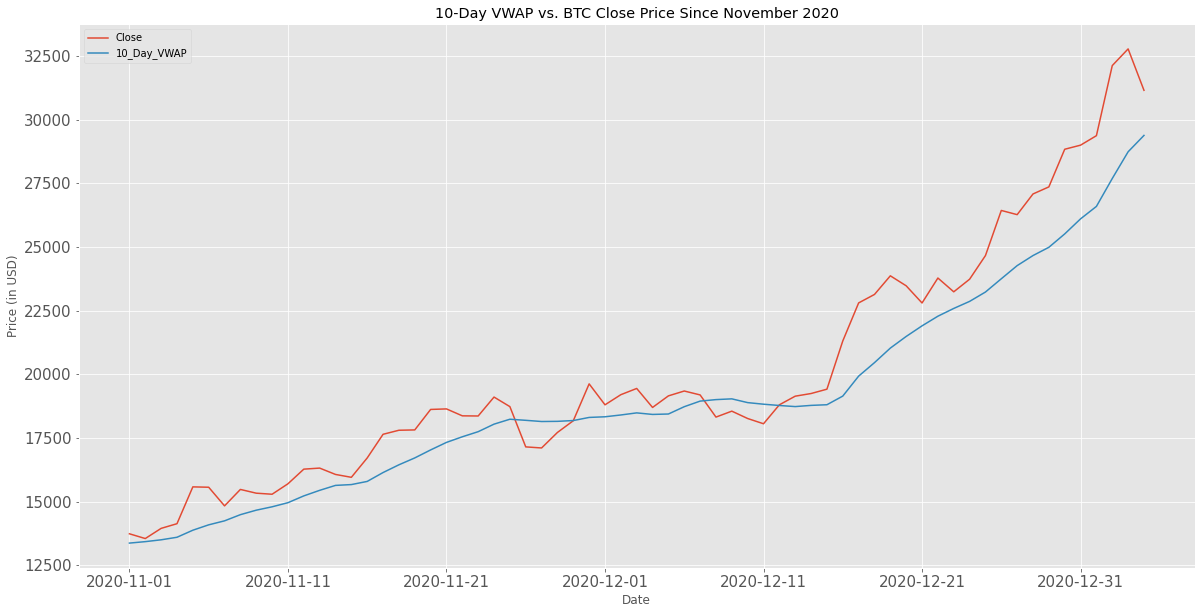

In [41]:
df_btc[df_btc['Date'] >= '2020-11-01'].plot('Date', ['Close', '10_Day_VWAP'], figsize = (20, 10), title = '10-Day VWAP vs. BTC Close Price Since November 2020', ylabel = 'Price (in USD)', fontsize = 15)

<AxesSubplot:title={'center':"BTC's MACD Line vs. Signal Line Since November 2020"}, xlabel='Date', ylabel='EMA (in USD)'>

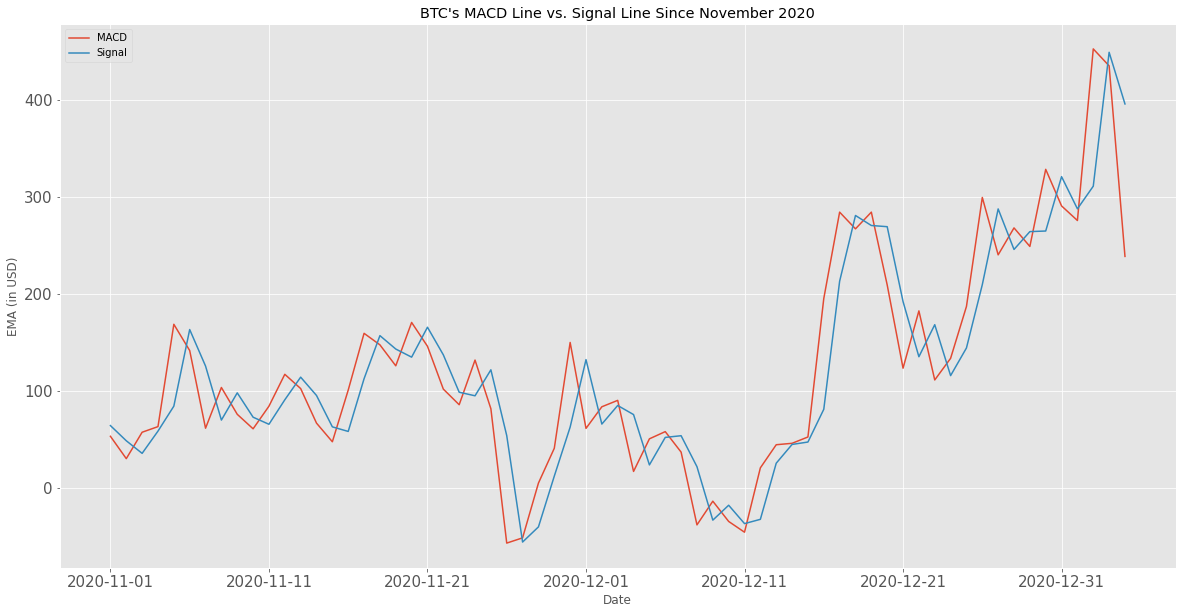

In [42]:
df_btc[df_btc['Date'] >= '2020-11-01'].plot('Date', ['MACD', 'Signal'], figsize = (20, 10), title = 'BTC\'s MACD Line vs. Signal Line Since November 2020', ylabel = 'EMA (in USD)', fontsize = 15)

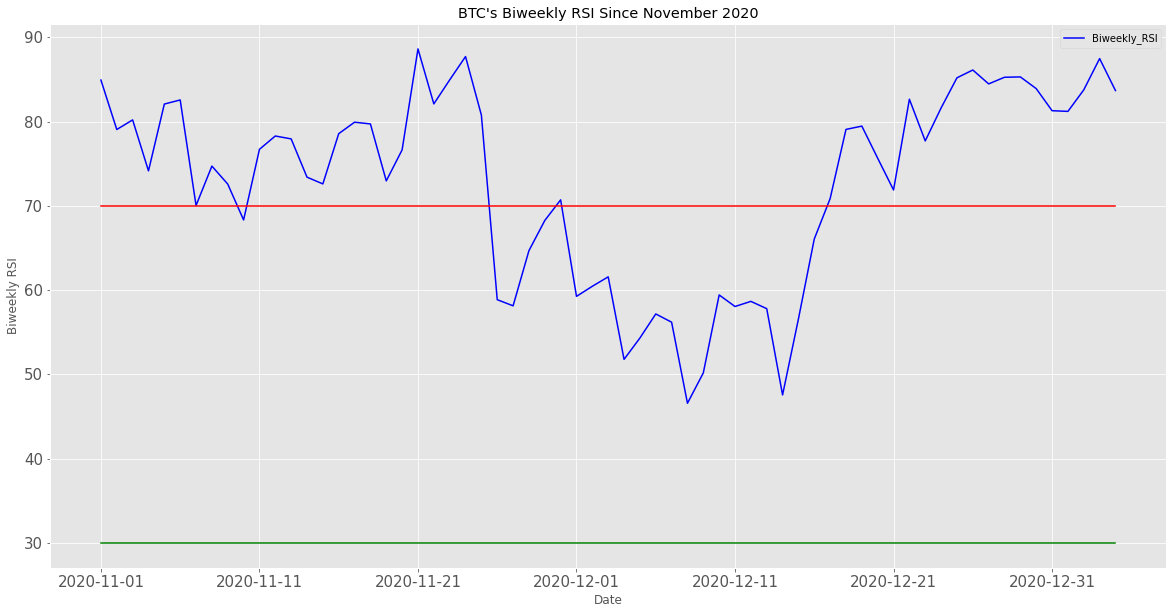

In [45]:
df_btc[df_btc['Date'] >= '2020-11-01'].plot('Date', 'Biweekly_RSI', figsize = (20, 10), title = 'BTC\'s Biweekly RSI Since November 2020', ylabel = 'Biweekly RSI', fontsize = 15, color = 'blue')
plt.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], [70] * len(df_btc[df_btc['Date'] >= '2020-11-01']), color = 'red')
plt.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], [30] * len(df_btc[df_btc['Date'] >= '2020-11-01']), color = 'green')

In [46]:
df_hist = df_btc[df_btc['Date'] >= '2020-03-01'][['Date', 'Daily_Return']]

In [47]:
max_df = df_hist['Daily_Return'].max()

In [48]:
min_df = df_hist['Daily_Return'].min()

In [49]:
bins = int((max_df - min_df)/0.01)

In [50]:
df_hist['Daily_Return_Perc'] = df_hist['Daily_Return'] * 100

Text(0, 0.5, 'Count')

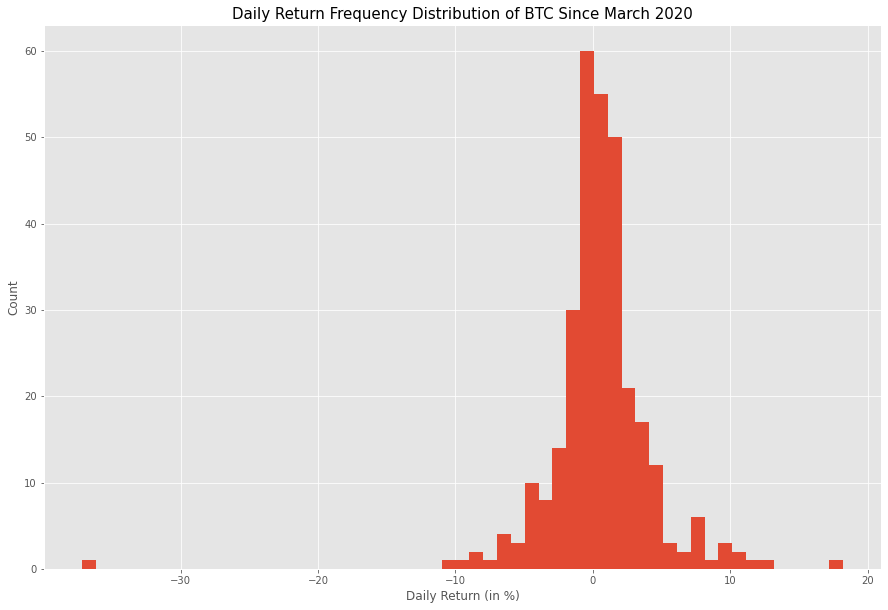

In [51]:
df_hist.hist(column = 'Daily_Return_Perc', bins = bins, figsize = (15, 10))
plt.title('Daily Return Frequency Distribution of BTC Since March 2020', fontsize = 15)
plt.xlabel('Daily Return (in %)')
plt.ylabel('Count')

In [52]:
len(df_hist)

310

In [53]:
#at 99% confidence, 3rd value in from greatest loss; at 95% confidence, 15th value in from greatest loss

In [54]:
df_hist.sort_values('Daily_Return_Perc').head(15)

Date  Daily_Return  Daily_Return_Perc
2003  2020-03-12     -0.371695         -37.169539
2178  2020-09-03     -0.102395         -10.239476
1999  2020-03-08     -0.089993          -8.999349
2062  2020-05-10     -0.087292          -8.729152
2262  2020-11-26     -0.084427          -8.442707
2007  2020-03-16     -0.070069          -7.006916
2005  2020-03-14     -0.065306          -6.530553
2085  2020-06-02     -0.062698          -6.269775
2146  2020-08-02     -0.060034          -6.003427
2032  2020-04-10     -0.059791          -5.979058
2013  2020-03-22     -0.057366          -5.736584
2094  2020-06-11     -0.055553          -5.555301
2020  2020-03-29     -0.051288          -5.128820
2301  2021-01-04     -0.049604          -4.960369
2243  2020-11-07     -0.047034          -4.703408

In [113]:
#Historical VaR
# -9% to -10% loss at 99% confidence, -4% to -5% at 95% confidence based on this time interval from March 1, 2020

In [56]:
df_btc.set_index('Date', drop = True, inplace = True)
df_bch.set_index('Date', drop = True, inplace = True)
df_bnb.set_index('Date', drop = True, inplace = True)
df_bsv.set_index('Date', drop = True, inplace = True)
df_eos.set_index('Date', drop = True, inplace = True)
df_eth.set_index('Date', drop = True, inplace = True)
df_ltc.set_index('Date', drop = True, inplace = True)
df_xrp.set_index('Date', drop = True, inplace = True)
df_xtz.set_index('Date', drop = True, inplace = True)

In [57]:
df_corr = pd.concat([df_btc['Close'], df_bch['Close'], df_bnb['Close'], df_bsv['Close'], 
                     df_eos['Close'], df_eth['Close'], df_ltc['Close'], df_xrp['Close'], df_xtz['Close']], 
                     keys = ['Close_BTC', 'Close_BCH', 'Close_BNB', 'Close_BSV', 'Close_EOS', 'Close_ETH', 'Close_LTC', 
                              'Close_XRP', 'Close_XTZ'], axis = 1)

In [150]:
df_corr[['Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']] = float('NaN')

In [152]:
for i in range(1, len(df_corr)):
    df_corr['Close_BCH_lag_1'][i] = df_corr['Close_BCH'][i-1]
    df_corr['Close_BNB_lag_1'][i] = df_corr['Close_BNB'][i-1]
    df_corr['Close_BSV_lag_1'][i] = df_corr['Close_BSV'][i-1]
    df_corr['Close_EOS_lag_1'][i] = df_corr['Close_EOS'][i-1]
    df_corr['Close_ETH_lag_1'][i] = df_corr['Close_ETH'][i-1]
    df_corr['Close_LTC_lag_1'][i] = df_corr['Close_LTC'][i-1]
    df_corr['Close_XRP_lag_1'][i] = df_corr['Close_XRP'][i-1]
    df_corr['Close_XTZ_lag_1'][i] = df_corr['Close_XTZ'][i-1]

Close_BTC   Close_BCH  Close_BNB   Close_BSV  Close_EOS  \
2014-09-17    457.334015         NaN        NaN         NaN        NaN   
2014-09-18    424.440002         NaN        NaN         NaN        NaN   
2014-09-19    394.795990         NaN        NaN         NaN        NaN   
2014-09-20    408.903992         NaN        NaN         NaN        NaN   
2014-09-21    398.821014         NaN        NaN         NaN        NaN   
...                  ...         ...        ...         ...        ...   
2020-12-31  29001.720703  343.052643  37.376034  163.632034   2.597977   
2021-01-01  29374.152344  341.985657  37.905010  163.115814   2.635439   
2021-01-02  32127.267578  354.599945  38.241592  163.089386   2.626426   
2021-01-03  32782.023438  421.789856  41.148979  171.390671   2.795052   
2021-01-04  31155.914063  397.799377  39.300949  166.349564   2.748787   

              Close_ETH   Close_LTC  Close_XRP  Close_XTZ  Close_BCH_lag_1  \
2014-09-17          NaN    5.058550   0.005399        NaN              NaN   
2014-09-18          NaN    4.685230   0.005135        NaN              NaN   
2014-09-19          NaN    4.327770   0.004942        NaN              NaN   
2014-09-20          NaN    4.286440   0.004772        NaN              NaN   
2014-09-21          NaN    4.245920   0.004570        NaN              NaN   
...                 ...         ...        ...        ...              ...   
2020-12-31   737.803406  124.690323   0.219846   2.015081       358.808014   
2021-01-01   730.367554  126.230347   0.237444   2.008919       343.052643   
2021-01-02   774.534973  136.944885   0.221655   1.998693       341.985657   
2021-01-03   975.507690  160.190582   0.225848   2.133314       354.599945   
2021-01-04  1003.246155  149.217896   0.232103   2.128711       421.789856   

            Close_BNB_lag_1  Close_BSV_lag_1  Close_EOS_lag_1  \
2014-09-17              NaN              NaN              NaN   
2014-09-18              NaN              NaN              NaN   
2014-09-19              NaN              NaN              NaN   
2014-09-20              NaN              NaN              NaN   
2014-09-21              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-12-31        38.136299       166.903091         2.609923   
2021-01-01        37.376034       163.632034         2.597977   
2021-01-02        37.905010       163.115814         2.635439   
2021-01-03        38.241592       163.089386         2.626426   
2021-01-04        41.148979       171.390671         2.795052   

            Close_ETH_lag_1  Close_LTC_lag_1  Close_XRP_lag_1  Close_XTZ_lag_1  
2014-09-17              NaN              NaN              NaN              NaN  
2014-09-18              NaN         5.058550         0.005399              NaN  
2014-09-19              NaN         4.685230         0.005135              NaN  
2014-09-20              NaN         4.327770         0.004942              NaN  
2014-09-21              NaN         4.286440         0.004772              NaN  
...                     ...              ...              ...              ...  
2020-12-31       751.618958       129.466080         0.211828         1.989524  
2021-01-01       737.803406       124.690323         0.219846         2.015081  
2021-01-02       730.367554       126.230347         0.237444         2.008919  
2021-01-03       774.534973       136.944885         0.221655         1.998693  
2021-01-04       975.507690       160.190582         0.225848         2.133314  

[2302 rows x 17 columns]

In [156]:
corrMatrix = df_corr[['Close_BTC', 'Close_BCH', 'Close_BNB', 'Close_BSV', 'Close_EOS', 'Close_ETH', 'Close_LTC', 'Close_XRP', 'Close_XTZ']].corr()

<AxesSubplot:>

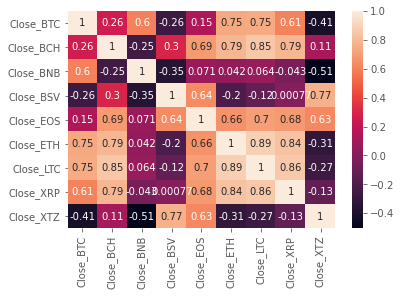

In [157]:
sns.heatmap(corrMatrix, annot=True)

In [160]:
corrMatrix = df_corr[['Close_BTC', 'Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']].corr()

<AxesSubplot:>

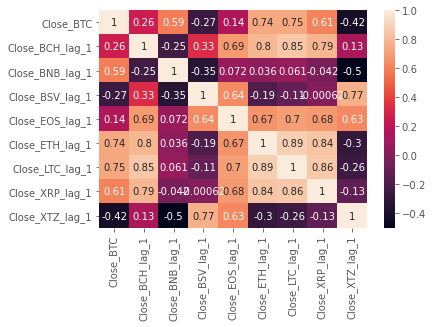

In [167]:
sns.heatmap(corrMatrix, annot=True)

In [162]:
df_corr_time_lag = df_corr[['Close_BTC', 'Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']]

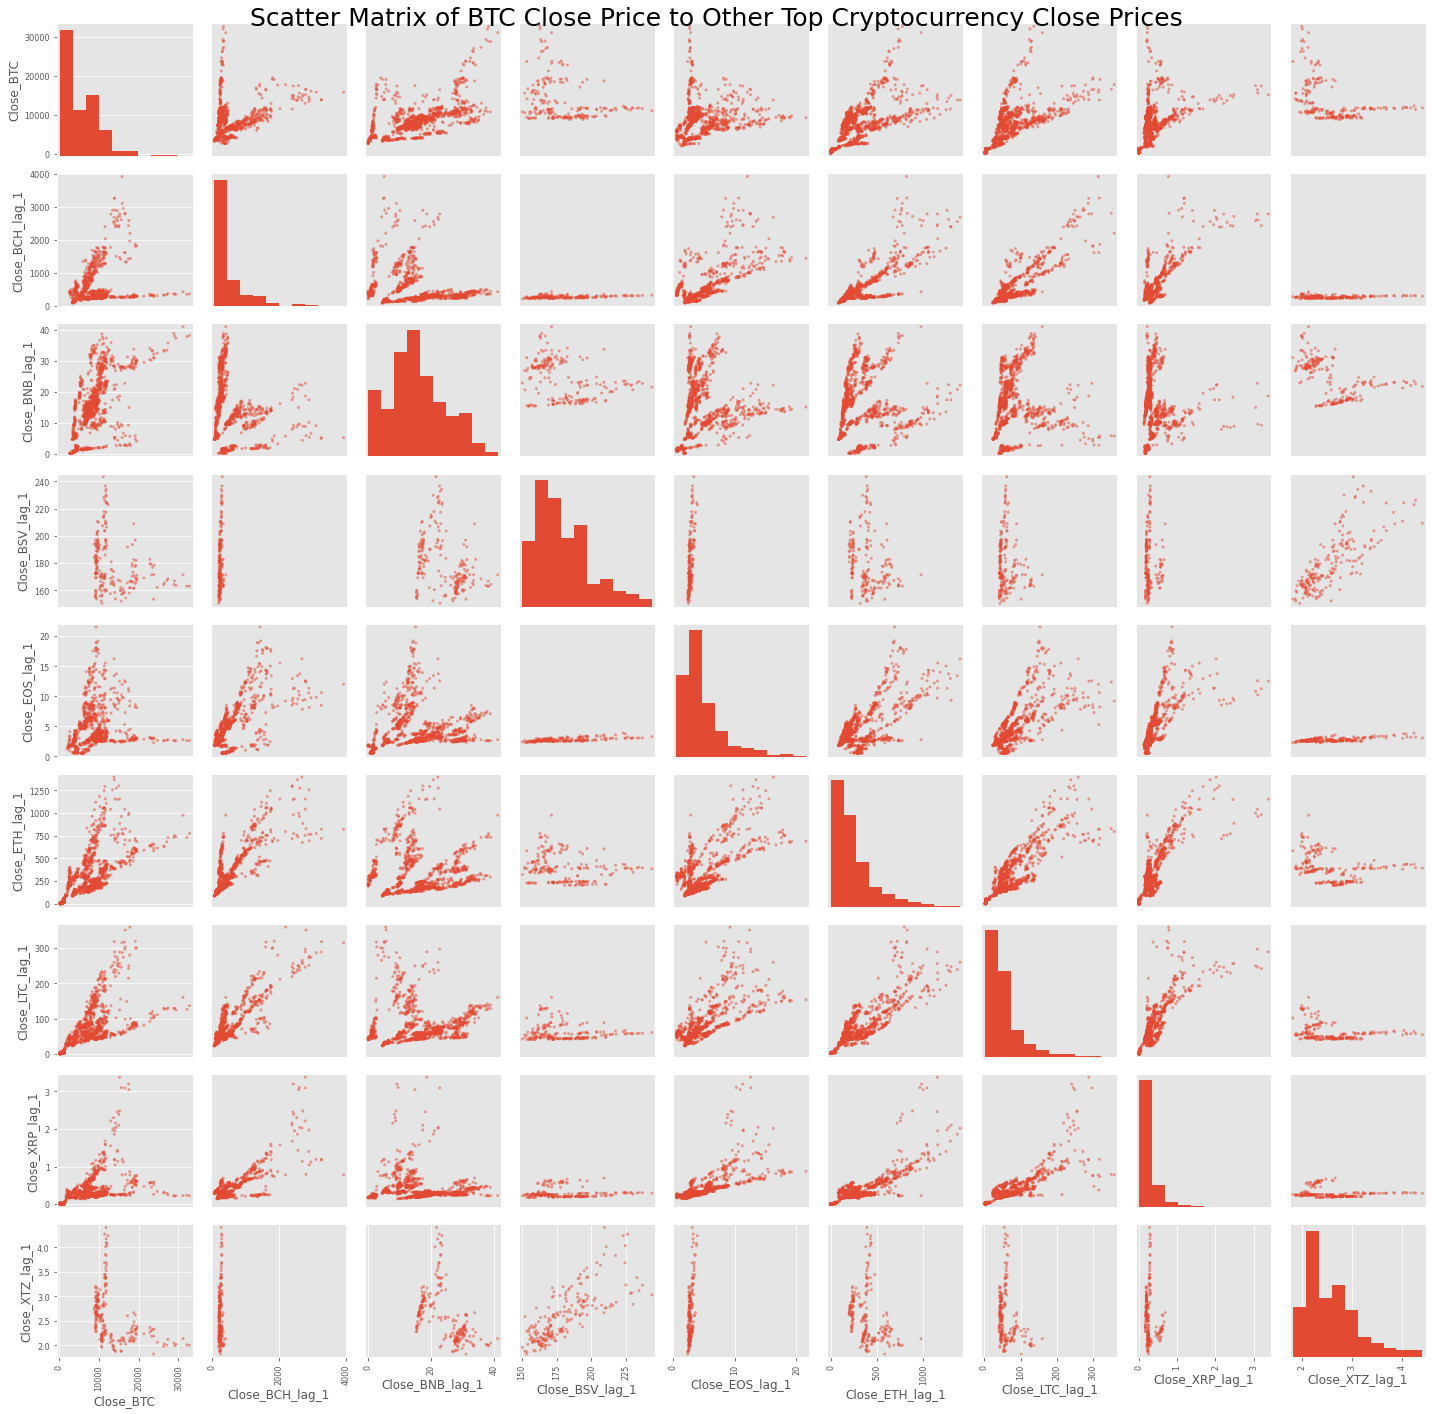

In [163]:
pd.plotting.scatter_matrix(df_corr_time_lag, figsize = (20,20))
plt.suptitle('Scatter Matrix of BTC Close Price to Other Top Cryptocurrency Close Prices', fontsize = 25)
plt.tight_layout()

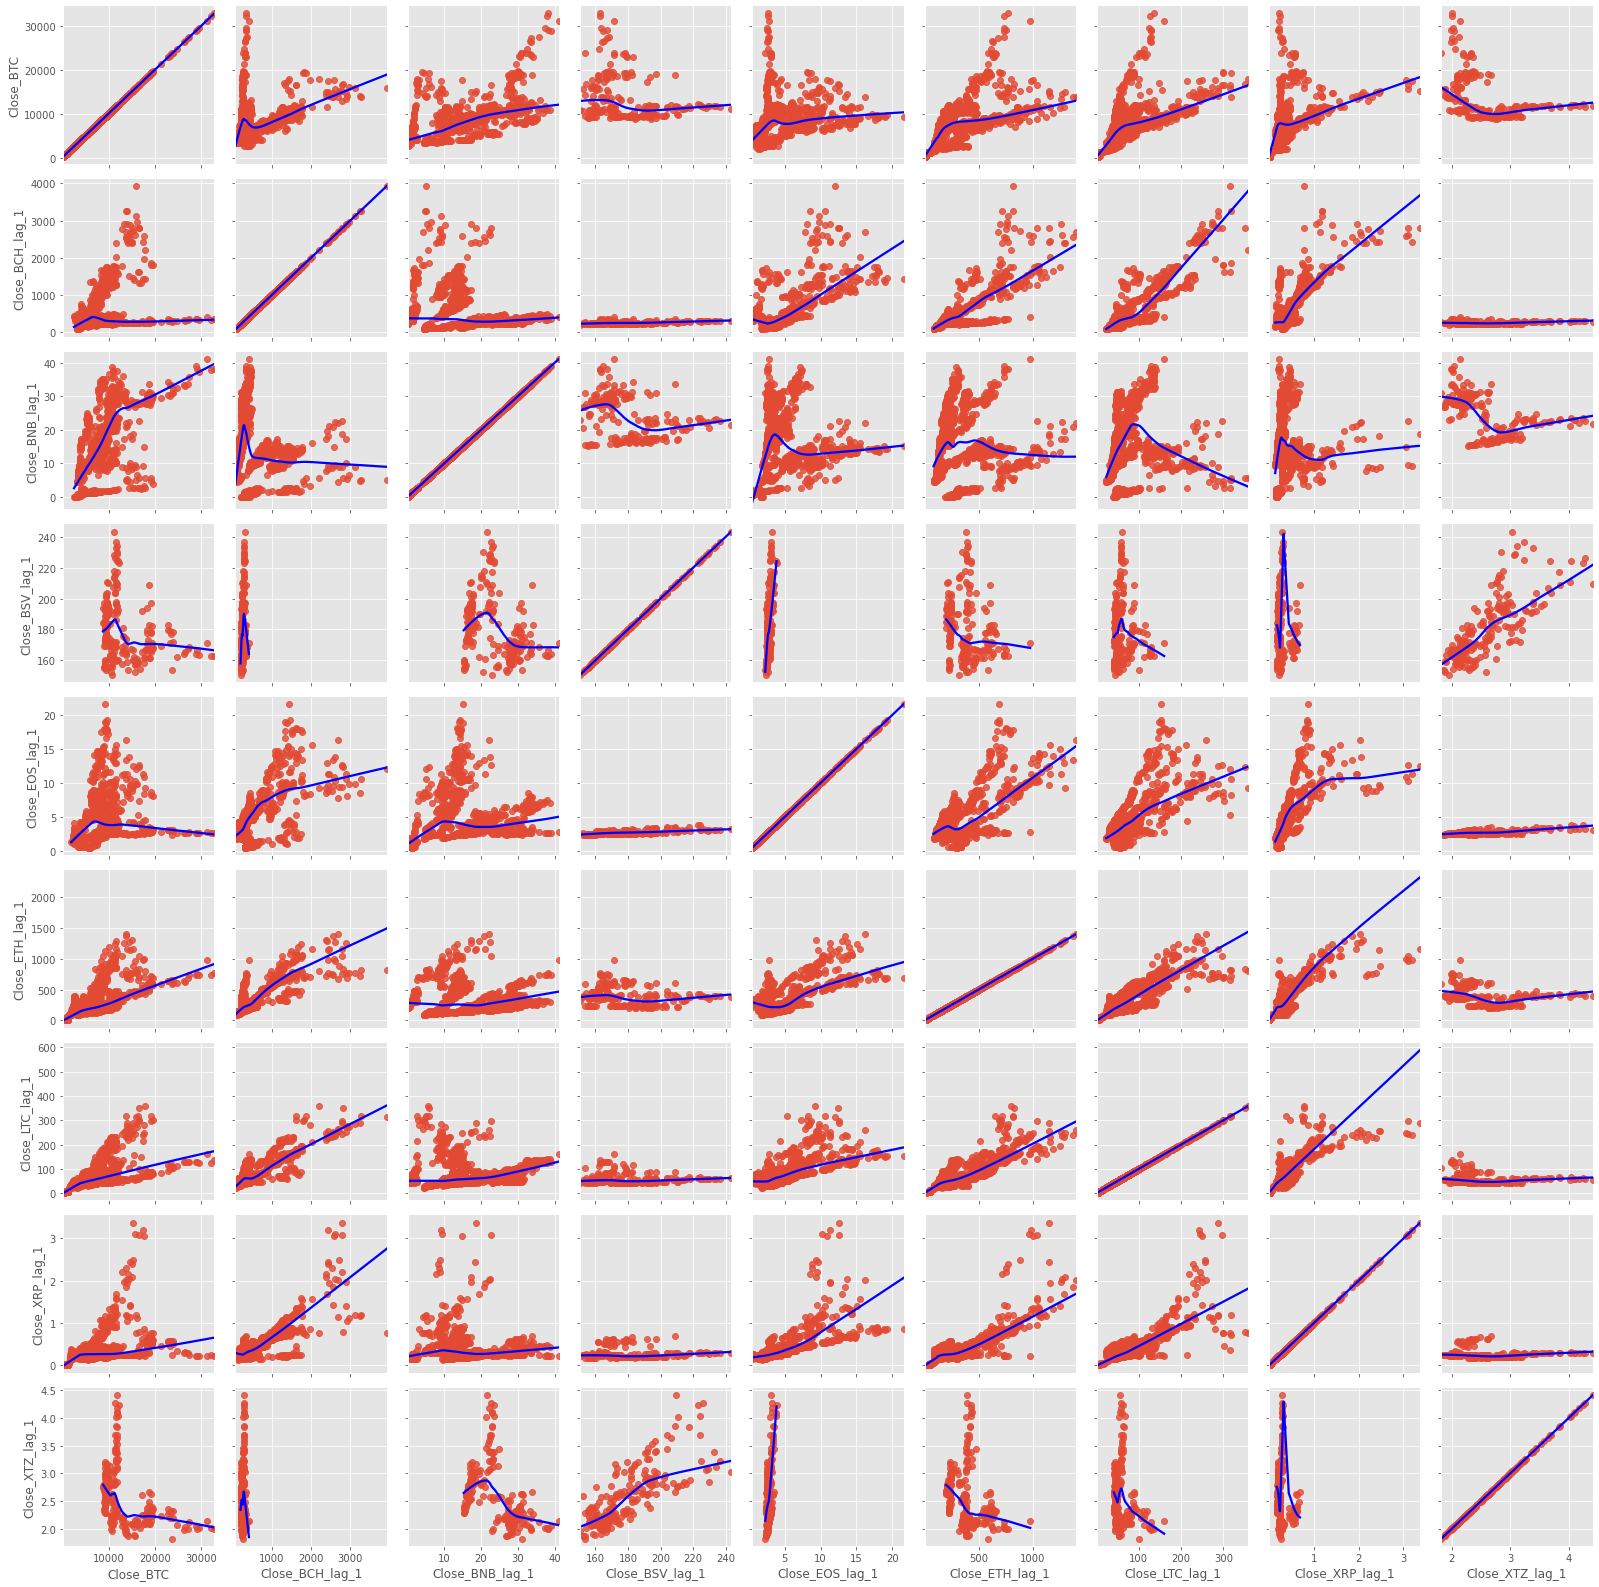

In [164]:
grids = sns.PairGrid(df_corr_time_lag)
grids = grids.map(sns.regplot, lowess=True, scatter = True, line_kws={'color': 'blue'})

In [165]:
#df.corr is NaN tolerant, so no need to account for removing NaN's
df_corr_time_lag.corr()['Close_BTC']

Close_BTC          1.000000
Close_BCH_lag_1    0.257528
Close_BNB_lag_1    0.594031
Close_BSV_lag_1   -0.274059
Close_EOS_lag_1    0.142617
Close_ETH_lag_1    0.738237
Close_LTC_lag_1    0.745392
Close_XRP_lag_1    0.606790
Close_XTZ_lag_1   -0.417357
Name: Close_BTC, dtype: float64

In [63]:
#highest correlation of BTC Close Price among LTC, ETH, XRP, and BNB; will test for multicollinearity in subsequent
#time series model via VIF score, if VIF > 5, multicollinearity exists!
#these correlations consider all available data!!!

In [64]:
#However, for linear trend/seasonal time series baseline model, upward linear trend initiates in March, 2020
#Therefore, correlation from March, 2020 to Present will be considered to add to baseline model

In [168]:
df_corr_baseline = df_corr_time_lag[df_corr_time_lag.index >= '2020-03-01']

In [169]:
corrMatrix_baseline = df_corr_baseline.corr()

<AxesSubplot:>

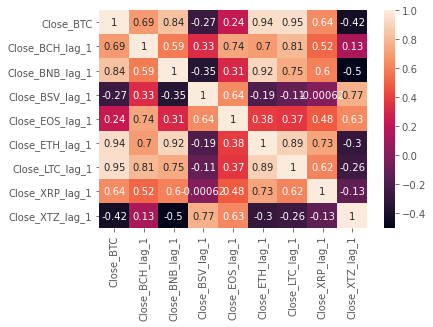

In [170]:
sns.heatmap(corrMatrix_baseline, annot=True)

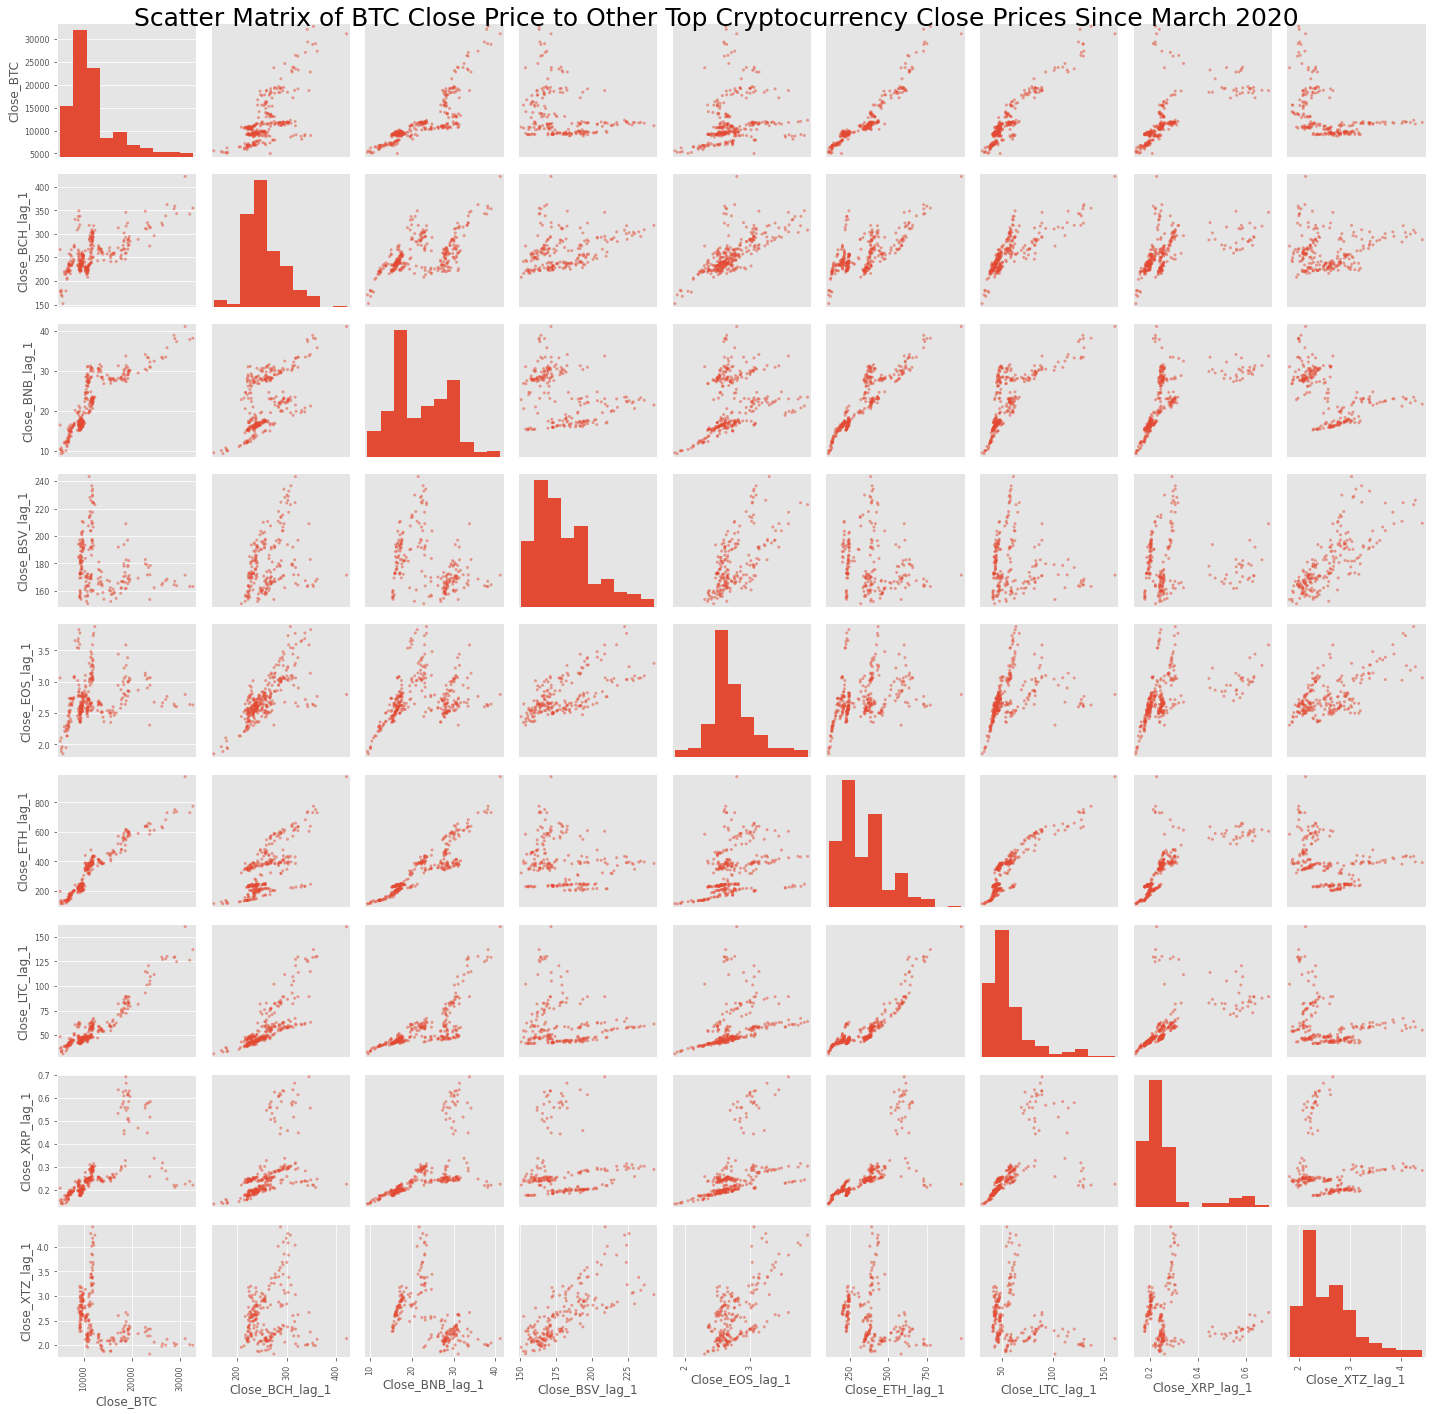

In [171]:
pd.plotting.scatter_matrix(df_corr_baseline, figsize = (20,20))
plt.suptitle('Scatter Matrix of BTC Close Price to Other Top Cryptocurrency Close Prices Since March 2020', fontsize = 25)
plt.tight_layout()

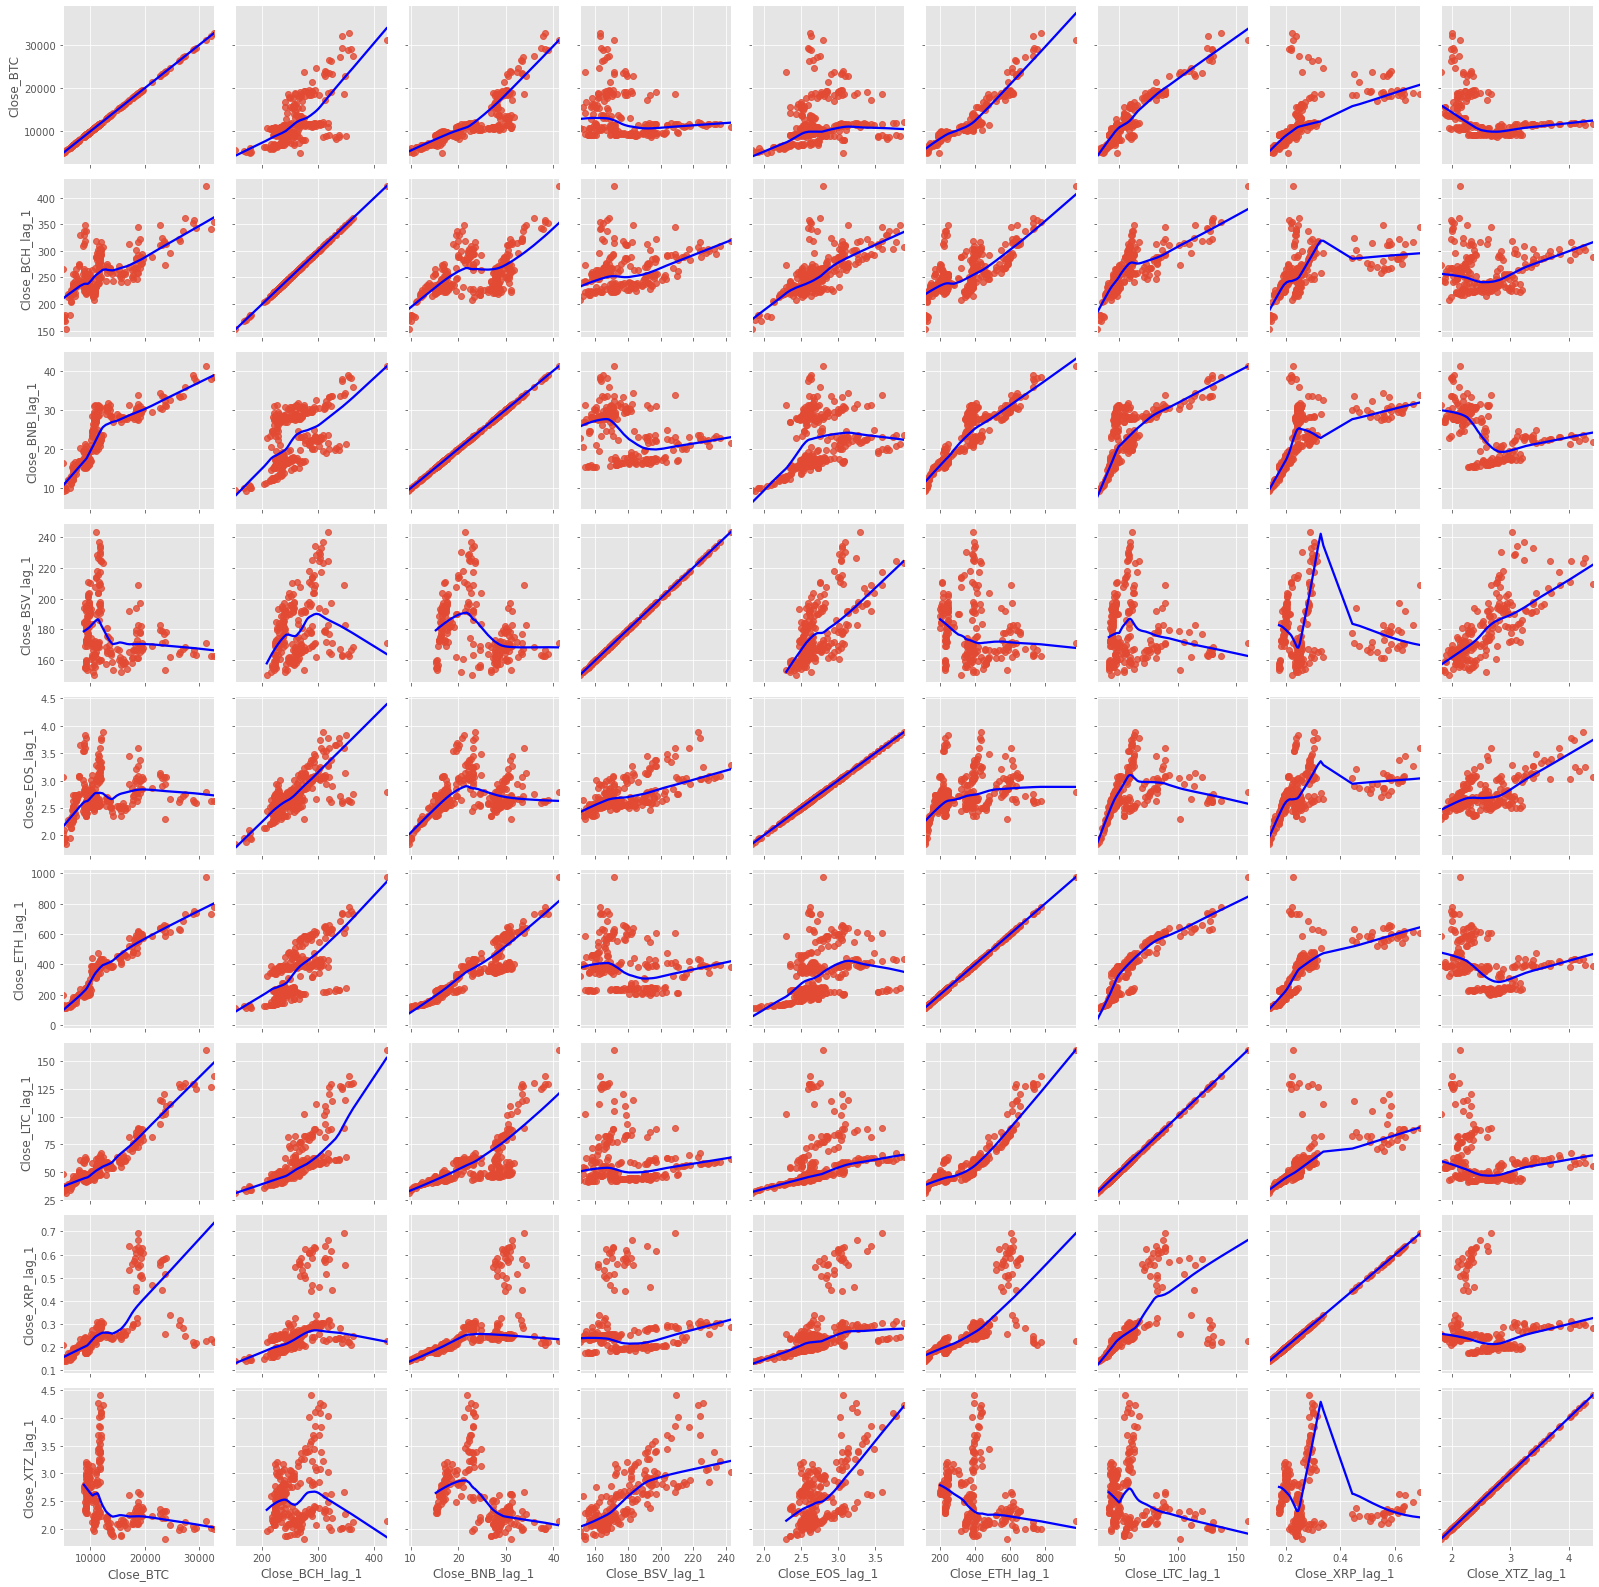

In [172]:
grids = sns.PairGrid(df_corr_baseline)
grids = grids.map(sns.regplot, lowess=True, scatter = True, line_kws={'color': 'blue'})

In [173]:
#highest correlation of BTC Close Price to LTC, ETH, BNB, BCH, and XRP
#will test for multicollinearity of explanatory variables when constructing best-fit model

Text(0, 0.5, 'BTC Closing Price (in USD)')

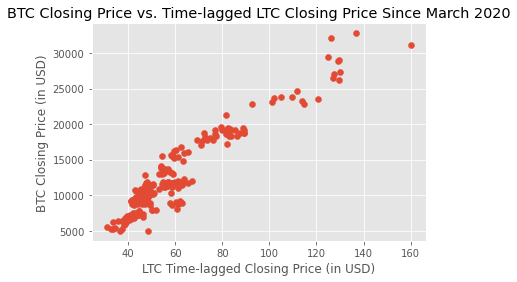

In [181]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_LTC_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged LTC Closing Price Since March 2020')
ax.set_xlabel('LTC Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

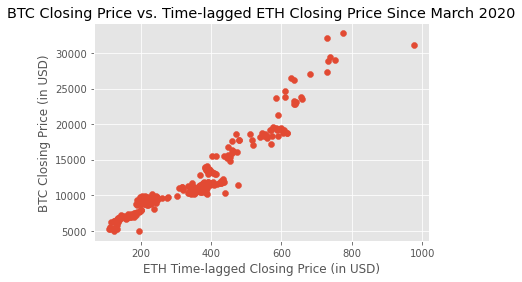

In [180]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_ETH_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged ETH Closing Price Since March 2020')
ax.set_xlabel('ETH Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

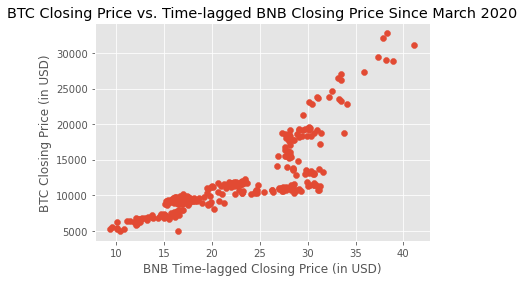

In [179]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_BNB_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged BNB Closing Price Since March 2020')
ax.set_xlabel('BNB Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

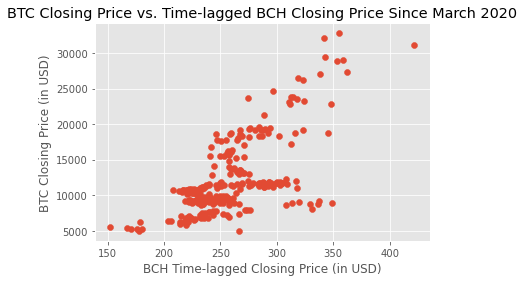

In [182]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_BCH_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged BCH Closing Price Since March 2020')
ax.set_xlabel('BCH Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

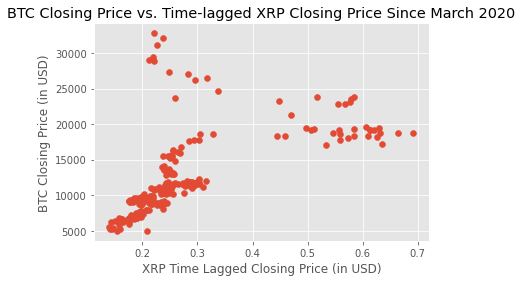

In [184]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_XRP_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged XRP Closing Price Since March 2020')
ax.set_xlabel('XRP Time Lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

In [75]:
df_btc_baseline = df_btc[df_btc.index >= '2020-03-01']

In [76]:
df_btc_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 2020-03-01 to 2021-01-04
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  310 non-null    float64
 1   High                  310 non-null    float64
 2   Low                   310 non-null    float64
 3   Close                 310 non-null    float64
 4   Adj Close             310 non-null    float64
 5   Volume                310 non-null    int64  
 6   Volume_Price          310 non-null    float64
 7   10_Day_VWAP           310 non-null    float64
 8   Daily_Return          310 non-null    float64
 9   Biweekly_RS           310 non-null    float64
 10  Biweekly_RSI          310 non-null    float64
 11  12_day_EMA            310 non-null    float64
 12  26_day_EMA            310 non-null    float64
 13  MACD                  310 non-null    float64
 14  Signal                310 non-null    float64
 15  Trend_Analys

In [77]:
#Since Mar 1, 2020, 292 days have elapsed, so all dates are accounted for
#Relative Time will initiate at Mar 1, 2020 = 0 and Dec 17, 2020 = 291, in terms of days elapsed

In [78]:
df_btc_baseline['Relative_Time'] = float('NaN')

<ipython-input-78-102ab6a989ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_baseline['Relative_Time'] = float('NaN')


In [79]:
for i in range(len(df_btc_baseline)):
    df_btc_baseline['Relative_Time'][i] = i

<ipython-input-79-0fd62e4c6d8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_baseline['Relative_Time'][i] = i
C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
model1 = ols('Close ~ Relative_Time', data = df_btc_baseline).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     701.0
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           2.35e-81
Time:                        11:55:53   Log-Likelihood:                -2900.4
No. Observations:                 310   AIC:                             5805.
Df Residuals:                     308   BIC:                             5812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4498.3004    318.242     14.135      0.000    3872.097    5124.504
Relative_Time    47.1929      1.782     26.477      0.000      43.686      50.700
==============================================================================
Omnibus:                      121.827   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.890
Skew:                           1.667   Prob(JB):                    1.39e-105
Kurtosis:                       8.126   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
df_btc_baseline_model1 = stat()
df_btc_baseline_model1.anova_stat(df = df_btc_baseline, res_var='Close', anova_model='Close ~ Relative_Time')
df_btc_baseline_model1.anova_summary

df        sum_sq       mean_sq          F        PR(>F)
Relative_Time    1.0  5.529077e+09  5.529077e+09  701.02874  2.352060e-81
Residual       308.0  2.429224e+09  7.887091e+06        NaN           NaN

In [82]:
model1_fitted_y_values = model1.fittedvalues
model1_norm_resids = df_btc_baseline_model1.anova_std_residuals
model1_norm_resids_abs_sqrt = np.sqrt(np.abs(model1_norm_resids))
model1_lev = model1.get_influence().hat_matrix_diag

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

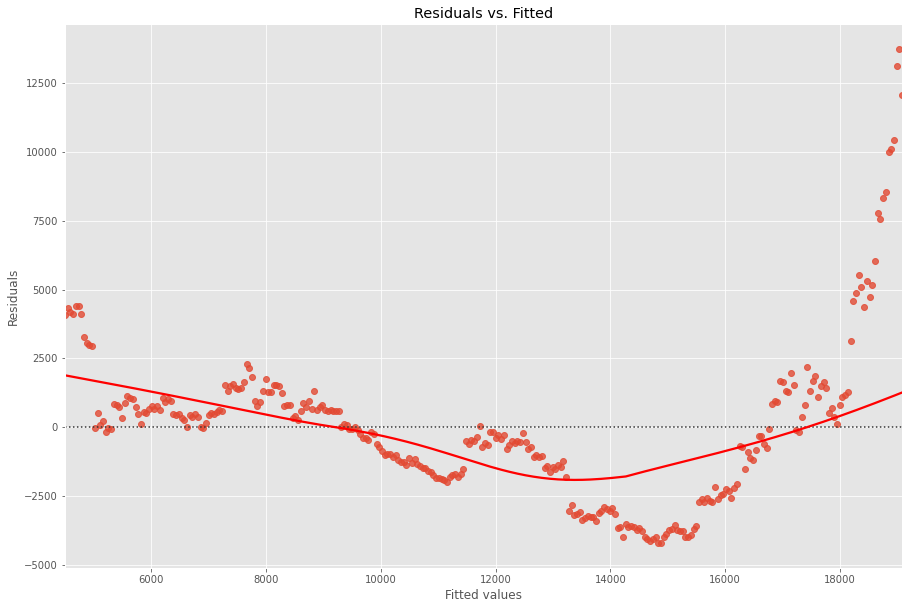

In [83]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model1_fitted_y_values, df_btc_baseline['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
#AUTOREGRESSION EVIDENT

Text(0, 0.5, 'Standardized residuals')

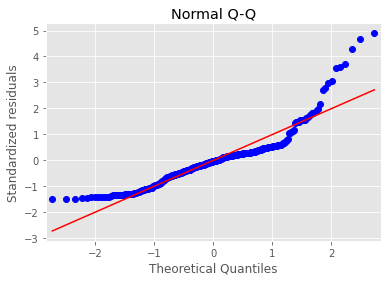

In [84]:
QQ = sgg.ProbPlot(model1_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

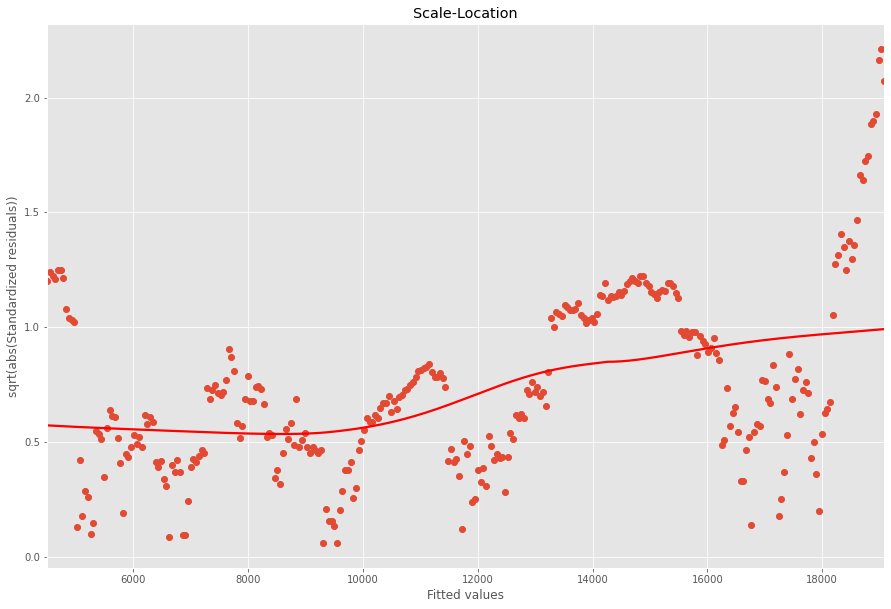

In [85]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model1_fitted_y_values, model1_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model1_fitted_y_values, model1_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(abs(Standardized residuals))')
#Autoregression EVIDENT

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized Residuals')

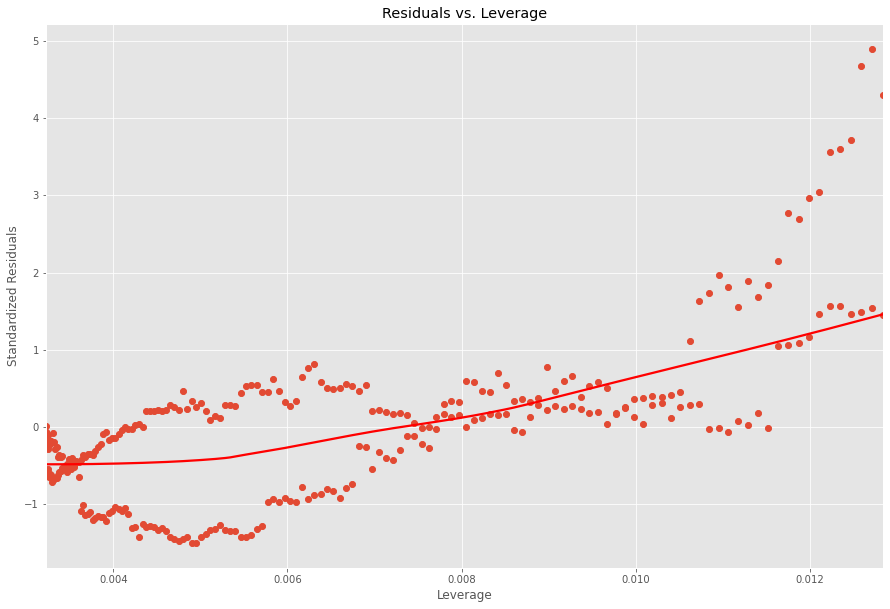

In [86]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model1_lev, model1_norm_resids)
sns.regplot(model1_lev, model1_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

In [87]:
#Baseline model, model1, will be used as a comparison in terms of improving R^2 score of subsequent models
#Based on assumptions of linear regression, i.e. a linear trend between the response/explanatory variables,
#no multicollinearity amongst its' explanatory variables, normality of its' residuals, and randomness of its' residuals 
#with constant variation; there is no randomness to its' errors, i.e. there is an autoregressive/cyclical nature to them,
#therefore this baseline model is not appropriate/cannot be used

In [88]:
#incorporate monthly seasonality into model
df_btc_baseline['Month'] = pd.to_datetime(df_btc_baseline.index).month

<ipython-input-88-148f3a3cbba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_baseline['Month'] = pd.to_datetime(df_btc_baseline.index).month


In [91]:
df_dummies_months = pd.get_dummies(df_btc_baseline['Month'], drop_first = True)
df_dummies_months.columns = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

In [92]:
#df_btc_baseline.drop('Month', axis = 1, inplace = True)

In [93]:
df_btc_baseline_dummies = pd.concat([df_btc_baseline, df_dummies_months], axis = 1)

In [94]:
model2 = ols('Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan', data = df_btc_baseline_dummies).fit()
model2.summary()
#all monthly dummy variables are statistically signficant!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     423.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.18e-174
Time:                        11:58:52   Log-Likelihood:                -2648.6
No. Observations:                 310   AIC:                             5321.
Df Residuals:                     298   BIC:                             5366.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.165e+04   2600.502      4.479      0.000    6530.566    1.68e+04
Relative_Time    64.1028      8.202      7.815      0.000      47.962      80.244
Apr           -5738.7666   2491.780     -2.303      0.022   -1.06e+04    -835.052
May           -7340.4395   2252.323     -3.259      0.001   -1.18e+04   -2907.967
Jun           -7256.8992   2014.610     -3.602      0.000   -1.12e+04   -3292.234
Jul           -8985.9579   1781.282     -5.045      0.000   -1.25e+04   -5480.471
Aug           -1.084e+04   1552.091     -6.984      0.000   -1.39e+04   -7785.971
Sep           -1.077e+04   1327.590     -8.109      0.000   -1.34e+04   -8152.472
Oct           -1.371e+04   1119.975    -12.244      0.000   -1.59e+04   -1.15e+04
Nov           -1.444e+04    931.611    -15.497      0.000   -1.63e+04   -1.26e+04
Dec           -1.164e+04    781.070    -14.899      0.000   -1.32e+04   -1.01e+04
Jan           -8254.9040    688.439    -11.991      0.000   -9609.723   -6900.085
==============================================================================
Omnibus:                       73.477   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.211
Skew:                           0.959   Prob(JB):                     5.23e-62
Kurtosis:                       7.263   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
df_btc_baseline_model2 = stat()
df_btc_baseline_model2.anova_stat(df = df_btc_baseline_dummies, res_var='Close', 
                                  anova_model='Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan')
df_btc_baseline_model2.anova_summary

df        sum_sq       mean_sq           F        PR(>F)
Relative_Time    1.0  9.810628e+07  9.810628e+07   61.081970  9.477349e-14
Apr              1.0  8.519254e+06  8.519254e+06    5.304175  2.196291e-02
May              1.0  1.705952e+07  1.705952e+07   10.621429  1.247201e-03
Jun              1.0  2.084030e+07  2.084030e+07   12.975381  3.696625e-04
Jul              1.0  4.087398e+07  4.087398e+07   25.448557  7.910907e-07
Aug              1.0  7.835043e+07  7.835043e+07   48.781779  1.869693e-11
Sep              1.0  1.056071e+08  1.056071e+08   65.752036  1.342141e-14
Oct              1.0  2.407682e+08  2.407682e+08  149.904737  3.395325e-28
Nov              1.0  3.857383e+08  3.857383e+08  240.164614  3.888304e-40
Dec              1.0  3.565309e+08  3.565309e+08  221.979768  6.662307e-38
Jan              1.0  2.309279e+08  2.309279e+08  143.778095  2.679622e-27
Residual       298.0  4.786301e+08  1.606141e+06         NaN           NaN

In [97]:
model2_fitted_y_values = model2.fittedvalues
model2_norm_resids = df_btc_baseline_model2.anova_std_residuals
model2_norm_resids_abs_sqrt = np.sqrt(np.abs(model2_norm_resids))
model2_lev = model2.get_influence().hat_matrix_diag

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

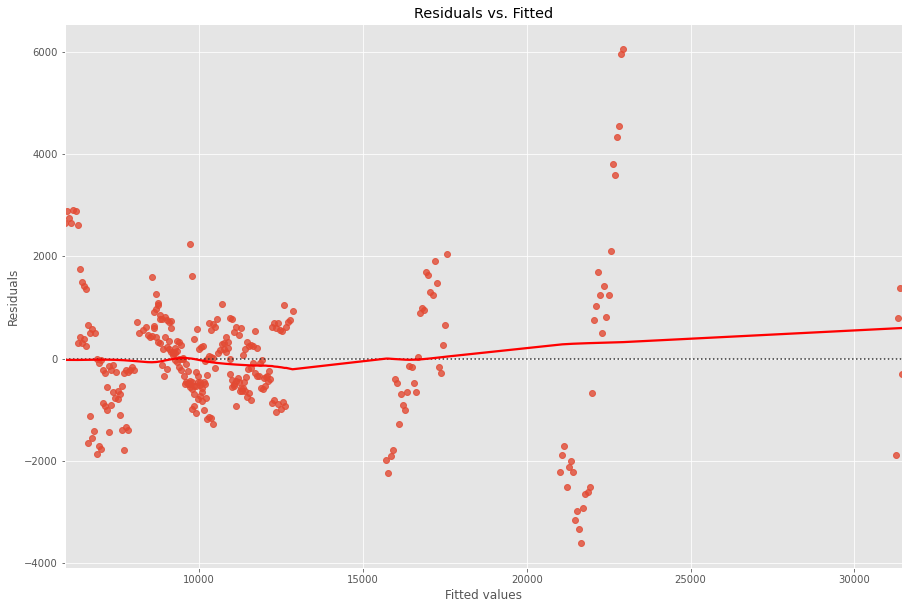

In [98]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model2_fitted_y_values, df_btc_baseline_dummies['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Standardized residuals')

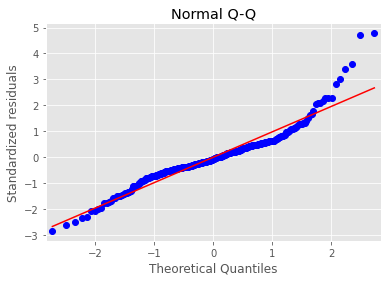

In [99]:
QQ = sgg.ProbPlot(model2_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

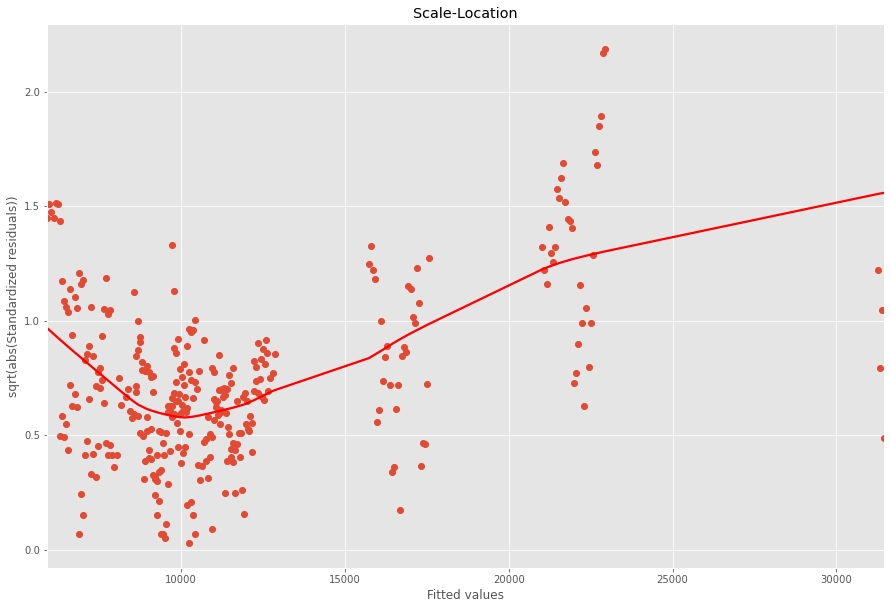

In [100]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model2_fitted_y_values, model2_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model2_fitted_y_values, model2_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(abs(Standardized residuals))')
#constant variation and randomness of errors/residuals

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized Residuals')

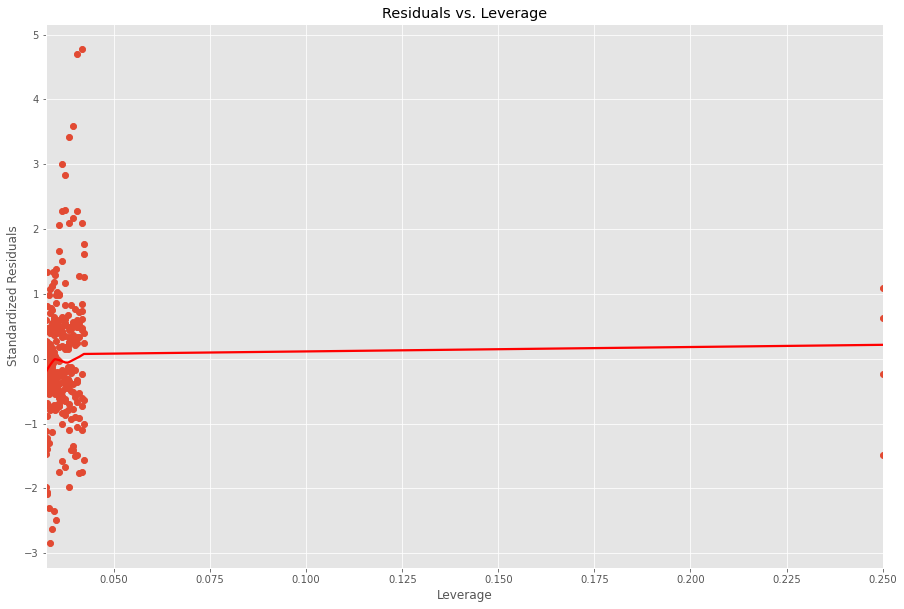

In [101]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model2_lev, model2_norm_resids)
sns.regplot(model2_lev, model2_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

In [102]:
y_pred_2 = model2.predict(df_btc_baseline_dummies[['Relative_Time', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']])

In [103]:
y_pred_1 = model1.predict(df_btc_baseline['Relative_Time'])

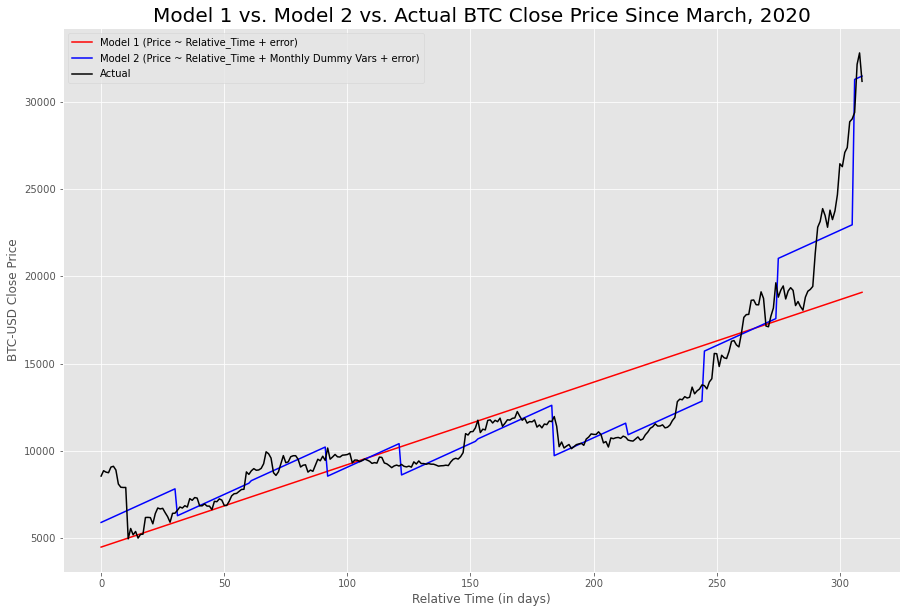

In [114]:
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_baseline_dummies['Relative_Time']
actual = df_btc_baseline['Close']
ax.plot(t, y_pred_1, color = 'red', label = 'Model 1 (Price ~ Relative_Time + error)')
ax.plot(t, y_pred_2, color = 'blue', label = 'Model 2 (Price ~ Relative_Time + Monthly Dummy Vars + error)')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('Model 1 vs. Model 2 vs. Actual BTC Close Price Since March, 2020', fontsize = 20)
ax.set_xlabel('Relative Time (in days)')
ax.set_ylabel('BTC-USD Close Price')
plt.legend()

In [116]:
#Strengthen model with correlated cryptocurrencies of LTC, ETH, BNB, and BCH

In [185]:
df_btc_CCC_dummies = pd.concat([df_btc_baseline_dummies, df_corr_baseline[['Close_LTC_lag_1', 'Close_ETH_lag_1', 'Close_BNB_lag_1', 'Close_BCH_lag_1', 'Close_XRP_lag_1']]], axis = 1)

In [186]:
df_btc_CCC_dummies.info() #all non-null values!

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 2020-03-01 to 2021-01-04
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  310 non-null    float64
 1   High                  310 non-null    float64
 2   Low                   310 non-null    float64
 3   Close                 310 non-null    float64
 4   Adj Close             310 non-null    float64
 5   Volume                310 non-null    int64  
 6   Volume_Price          310 non-null    float64
 7   10_Day_VWAP           310 non-null    float64
 8   Daily_Return          310 non-null    float64
 9   Biweekly_RS           310 non-null    float64
 10  Biweekly_RSI          310 non-null    float64
 11  12_day_EMA            310 non-null    float64
 12  26_day_EMA            310 non-null    float64
 13  MACD                  310 non-null    float64
 14  Signal                310 non-null    float64
 15  Trend_Analys

In [188]:
model3 = ols('Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_ETH_lag_1 + Close_BNB_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model3.summary()
#Close_BNB_lag_1's t-stat p-value is largest and greater than an alpha of 0.05, therefore it is statistically insignificant
#in describing the variation in BTC's Close Price for this time interval, will drop in subsequent model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1488.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          8.45e-270
Time:                        17:44:12   Log-Likelihood:                -2400.8
No. Observations:                 310   AIC:                             4836.
Df Residuals:                     293   BIC:                             4899.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3533.5600   1315.516      2.686      0.008     944.502    6122.618
Relative_Time      34.1166      4.602      7.414      0.000      25.060      43.173
Apr             -2967.8829   1193.050     -2.488      0.013   -5315.917    -619.849
May             -3367.4569   1093.688     -3.079      0.002   -5519.936   -1214.977
Jun             -2580.9593    986.556     -2.616      0.009   -4522.594    -639.325
Jul             -3356.6331    886.828     -3.785      0.000   -5101.994   -1611.273
Aug             -4316.1358    801.748     -5.383      0.000   -5894.050   -2738.222
Sep             -4896.1051    667.229     -7.338      0.000   -6209.274   -3582.936
Oct             -5595.1690    597.676     -9.362      0.000   -6771.452   -4418.886
Nov             -5698.6934    579.443     -9.835      0.000   -6839.092   -4558.295
Dec             -3886.5199    482.064     -8.062      0.000   -4835.267   -2937.772
Jan             -2983.5875    411.805     -7.245      0.000   -3794.058   -2173.117
Close_LTC_lag_1   128.0829      8.602     14.890      0.000     111.153     145.012
Close_ETH_lag_1    -1.1478      2.169     -0.529      0.597      -5.417       3.122
Close_BNB_lag_1    10.7994     29.301      0.369      0.713     -46.868      68.467
Close_BCH_lag_1     2.6907      2.986      0.901      0.368      -3.187       8.568
Close_XRP_lag_1 -3054.4751    627.768     -4.866      0.000   -4289.980   -1818.970
==============================================================================
Omnibus:                       45.901   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.311
Skew:                          -0.277   Prob(JB):                     8.42e-72
Kurtosis:                       8.003   Cond. No.                     4.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
model4 = ols('Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_ETH_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model4.summary()
#Close_ETH_lag_1's t-stat p-value is largest and greater than an alpha of 0.05, therefore it is statistically insignificant
#in describing the variation in BTC's Close Price for this time interval, will drop in subsequent model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1592.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.23e-271
Time:                        17:45:07   Log-Likelihood:                -2400.8
No. Observations:                 310   AIC:                             4834.
Df Residuals:                     294   BIC:                             4893.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3540.6207   1313.442      2.696      0.007     955.681    6125.560
Relative_Time      34.5614      4.434      7.794      0.000      25.835      43.288
Apr             -2978.9356   1190.919     -2.501      0.013   -5322.742    -635.129
May             -3380.6313   1091.496     -3.097      0.002   -5528.766   -1232.496
Jun             -2596.2837    984.230     -2.638      0.009   -4533.313    -659.255
Jul             -3387.3318    881.609     -3.842      0.000   -5122.397   -1652.267
Aug             -4349.0002    795.602     -5.466      0.000   -5914.797   -2783.204
Sep             -4930.5761    659.670     -7.474      0.000   -6228.849   -3632.303
Oct             -5574.5344    594.173     -9.382      0.000   -6743.906   -4405.163
Nov             -5656.1169    566.976     -9.976      0.000   -6771.964   -4540.270
Dec             -3882.4099    481.227     -8.068      0.000   -4829.495   -2935.325
Jan             -2991.7586    410.603     -7.286      0.000   -3799.852   -2183.665
Close_LTC_lag_1   128.1121      8.589     14.916      0.000     111.208     145.016
Close_ETH_lag_1    -1.0743      2.157     -0.498      0.619      -5.319       3.171
Close_BCH_lag_1     3.2930      2.496      1.319      0.188      -1.619       8.205
Close_XRP_lag_1 -3096.3129    616.511     -5.022      0.000   -4309.647   -1882.979
==============================================================================
Omnibus:                       46.551   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.572
Skew:                          -0.280   Prob(JB):                     3.02e-74
Kurtosis:                       8.089   Cond. No.                     4.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
model5 = ols('Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model5.summary()
#Close_BCH_lag_1's t-stat p-value is largest and greater than an alpha of 0.05, therefore it is statistically insignificant
#in describing the variation in BTC's Close Price for this time interval, will drop in subsequent model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1710.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          5.98e-273
Time:                        17:45:47   Log-Likelihood:                -2401.0
No. Observations:                 310   AIC:                             4832.
Df Residuals:                     295   BIC:                             4888.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3484.9658   1307.010      2.666      0.008     912.721    6057.211
Relative_Time      33.7509      4.119      8.193      0.000      25.644      41.858
Apr             -2826.4765   1149.433     -2.459      0.015   -5088.605    -564.348
May             -3217.3674   1039.775     -3.094      0.002   -5263.684   -1171.051
Jun             -2438.8310    930.881     -2.620      0.009   -4270.841    -606.821
Jul             -3239.3789    828.989     -3.908      0.000   -4870.861   -1607.897
Aug             -4196.1418    733.078     -5.724      0.000   -5638.867   -2753.417
Sep             -4831.1046    627.904     -7.694      0.000   -6066.844   -3595.365
Oct             -5483.5072    564.641     -9.711      0.000   -6594.743   -4372.272
Nov             -5533.0497    509.642    -10.857      0.000   -6536.044   -4530.055
Dec             -3773.5459    428.168     -8.813      0.000   -4616.198   -2930.894
Jan             -2896.1593    362.507     -7.989      0.000   -3609.587   -2182.732
Close_LTC_lag_1   125.5831      6.918     18.153      0.000     111.968     139.198
Close_BCH_lag_1     2.8018      2.290      1.224      0.222      -1.705       7.308
Close_XRP_lag_1 -3244.2963    539.490     -6.014      0.000   -4306.033   -2182.559
==============================================================================
Omnibus:                       50.777   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.958
Skew:                          -0.338   Prob(JB):                     2.84e-86
Kurtosis:                       8.481   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
model6 = ols('Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_XRP_lag_1 + Close_LTC_lag_1', 
             data = df_btc_CCC_dummies).fit()
model6.summary()
#all variables are statistically significant since t-stat p-values less than alpha of 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1838.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.88e-274
Time:                        17:58:57   Log-Likelihood:                -2401.8
No. Observations:                 310   AIC:                             4832.
Df Residuals:                     296   BIC:                             4884.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4073.1343   1216.427      3.348      0.001    1679.194    6467.075
Relative_Time      31.8863      3.830      8.324      0.000      24.348      39.425
Apr             -3064.5707   1133.794     -2.703      0.007   -5295.890    -833.252
May             -3403.0839   1029.501     -3.306      0.001   -5429.153   -1377.015
Jun             -2571.1464    925.355     -2.779      0.006   -4392.256    -750.037
Jul             -3312.7275    827.513     -4.003      0.000   -4941.282   -1684.173
Aug             -4224.7440    733.320     -5.761      0.000   -5667.926   -2781.562
Sep             -4772.8211    626.620     -7.617      0.000   -6006.017   -3539.625
Oct             -5456.8627    564.695     -9.663      0.000   -6568.188   -4345.537
Nov             -5415.8952    500.987    -10.810      0.000   -6401.844   -4429.947
Dec             -3694.8692    423.668     -8.721      0.000   -4528.653   -2861.086
Jan             -2905.3467    362.733     -8.010      0.000   -3619.210   -2191.483
Close_XRP_lag_1 -2986.6593    497.121     -6.008      0.000   -3964.999   -2008.319
Close_LTC_lag_1   132.5210      3.967     33.405      0.000     124.714     140.328
==============================================================================
Omnibus:                       49.492   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.484
Skew:                          -0.318   Prob(JB):                     6.50e-83
Kurtosis:                       8.376   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
model1_XRP = ols('Close_XRP_lag_1 ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1', 
             data = df_btc_CCC_dummies).fit()
model1_XRP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Close_XRP_lag_1   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.50
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           9.11e-63
Time:                        17:48:53   Log-Likelihood:                 404.98
No. Observations:                 310   AIC:                            -784.0
Df Residuals:                     297   BIC:                            -735.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3422      0.141      2.434      0.016       0.066       0.619
Relative_Time      -0.0003      0.000     -0.710      0.478      -0.001       0.001
Apr                -0.1467      0.132     -1.111      0.268      -0.407       0.113
May                -0.1315      0.120     -1.097      0.274      -0.368       0.105
Jun                -0.1065      0.108     -0.988      0.324      -0.319       0.106
Jul                -0.1090      0.096     -1.131      0.259      -0.299       0.081
Aug                -0.0926      0.085     -1.084      0.279      -0.261       0.076
Sep                 0.0090      0.073      0.123      0.902      -0.135       0.153
Oct                -0.0260      0.066     -0.394      0.694      -0.156       0.104
Nov                -0.0150      0.058     -0.257      0.797      -0.130       0.100
Dec                 0.1060      0.049      2.160      0.032       0.009       0.203
Jan                 0.2520      0.040      6.343      0.000       0.174       0.330
Close_LTC_lag_1    -0.0001      0.000     -0.291      0.771      -0.001       0.001
==============================================================================
Omnibus:                       73.961   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.685
Skew:                           0.587   Prob(JB):                    1.38e-179
Kurtosis:                      10.899   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
VIF_XRP = 1/(1-0.662)
VIF_XRP
#less than 5, therefore no significant multicollinearity with other explanatory variables

2.958579881656805

In [197]:
model2_LTC = ols('Close_LTC_lag_1 ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model2_LTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Close_LTC_lag_1   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     131.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.73e-111
Time:                        17:49:58   Log-Likelihood:                -1092.6
No. Observations:                 310   AIC:                             2211.
Df Residuals:                     297   BIC:                             2260.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          65.3849     17.383      3.761      0.000      31.175      99.595
Relative_Time       0.2345      0.054      4.315      0.000       0.128       0.341
Apr               -23.7176     16.527     -1.435      0.152     -56.242       8.807
May               -32.8453     14.937     -2.199      0.029     -62.242      -3.449
Jun               -37.8601     13.356     -2.835      0.005     -64.144     -11.576
Jul               -45.3472     11.815     -3.838      0.000     -68.598     -22.096
Aug               -52.0319     10.293     -5.055      0.000     -72.287     -31.776
Sep               -44.8468      8.788     -5.103      0.000     -62.142     -27.551
Oct               -62.7283      7.415     -8.460      0.000     -77.320     -48.137
Nov               -68.2195      6.167    -11.063      0.000     -80.356     -56.083
Dec               -57.1278      5.236    -10.911      0.000     -67.432     -46.824
Jan               -34.0382      4.924     -6.912      0.000     -43.729     -24.347
Close_XRP_lag_1    -2.1189      7.270     -0.291      0.771     -16.427      12.189
==============================================================================
Omnibus:                       46.990   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.871
Skew:                           0.798   Prob(JB):                     2.51e-21
Kurtosis:                       5.191   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
VIF_LTC = 1/(1-0.842)
VIF_LTC
#slightly greater than 5, therefore significant multicollinearity with other explanatory variables
#however, since this is a time-series model, multicollinearity isn't as big of an issue, care more about predictive power

6.329113924050632

In [200]:
df_btc_model6 = stat()
df_btc_model6.anova_stat(df = df_btc_CCC_dummies, res_var='Close', 
                                  anova_model='Close ~ Relative_Time + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_XRP_lag_1')
df_btc_model6.anova_summary

df        sum_sq       mean_sq            F         PR(>F)
Relative_Time      1.0  2.279308e+07  2.279308e+07    69.295596   3.167200e-15
Apr                1.0  2.403081e+06  2.403081e+06     7.305853   7.270105e-03
May                1.0  3.594092e+06  3.594092e+06    10.926769   1.064507e-03
Jun                1.0  2.539417e+06  2.539417e+06     7.720343   5.809241e-03
Jul                1.0  5.271319e+06  5.271319e+06    16.025880   7.905027e-05
Aug                1.0  1.091720e+07  1.091720e+07    33.190491   2.093970e-08
Sep                1.0  1.908265e+07  1.908265e+07    58.015131   3.527503e-13
Oct                1.0  3.071538e+07  3.071538e+07    93.380986   2.224301e-19
Nov                1.0  3.844009e+07  3.844009e+07   116.865687   3.530563e-23
Dec                1.0  2.501750e+07  2.501750e+07    76.058275   2.022604e-16
Jan                1.0  2.110174e+07  2.110174e+07    64.153561   2.661148e-14
Close_LTC_lag_1    1.0  3.670542e+08  3.670542e+08  1115.919283  1.976709e-102
Close_XRP_lag_1    1.0  1.187255e+07  1.187255e+07    36.094977   5.507561e-09
Residual         296.0  9.736192e+07  3.289254e+05          NaN            NaN

In [201]:
model6_fitted_y_values = model6.fittedvalues
model6_norm_resids = df_btc_model6.anova_std_residuals
model6_norm_resids_abs_sqrt = np.sqrt(np.abs(model6_norm_resids))
model6_lev = model6.get_influence().hat_matrix_diag

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

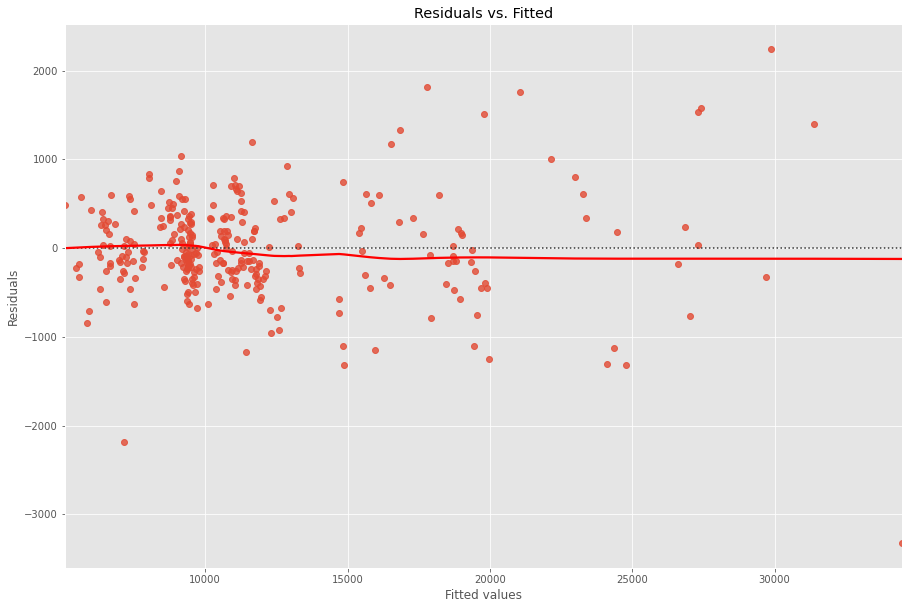

In [202]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model6_fitted_y_values, df_btc_CCC_dummies['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Standardized residuals')

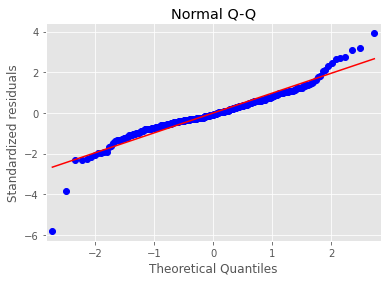

In [203]:
QQ = sgg.ProbPlot(model6_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

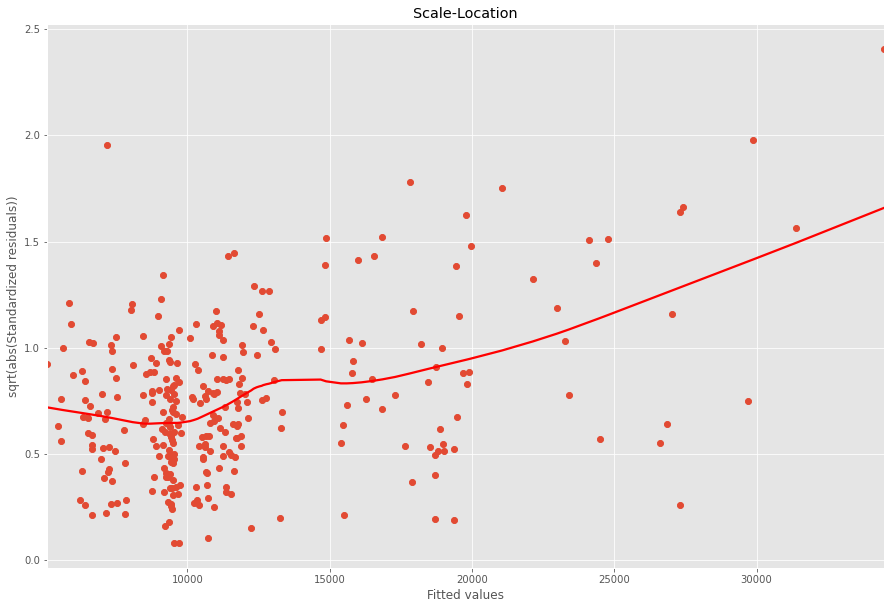

In [204]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model6_fitted_y_values, model6_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model6_fitted_y_values, model6_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(abs(Standardized residuals))')
#constant variation and randomness of errors/residuals

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized Residuals')

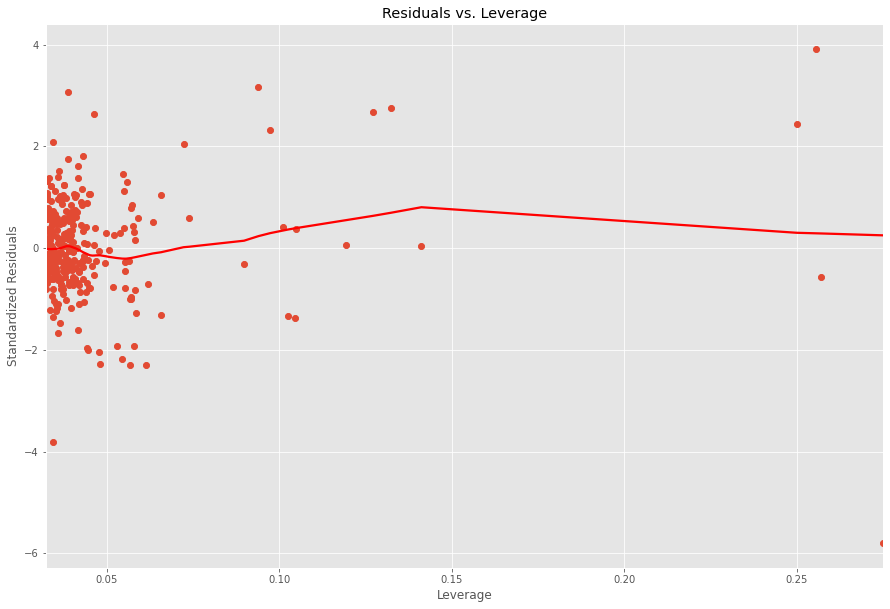

In [205]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model6_lev, model6_norm_resids)
sns.regplot(model6_lev, model6_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

In [206]:
y_pred_6 = model6.predict(df_btc_CCC_dummies[['Relative_Time', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Close_LTC_lag_1', 'Close_XRP_lag_1']])

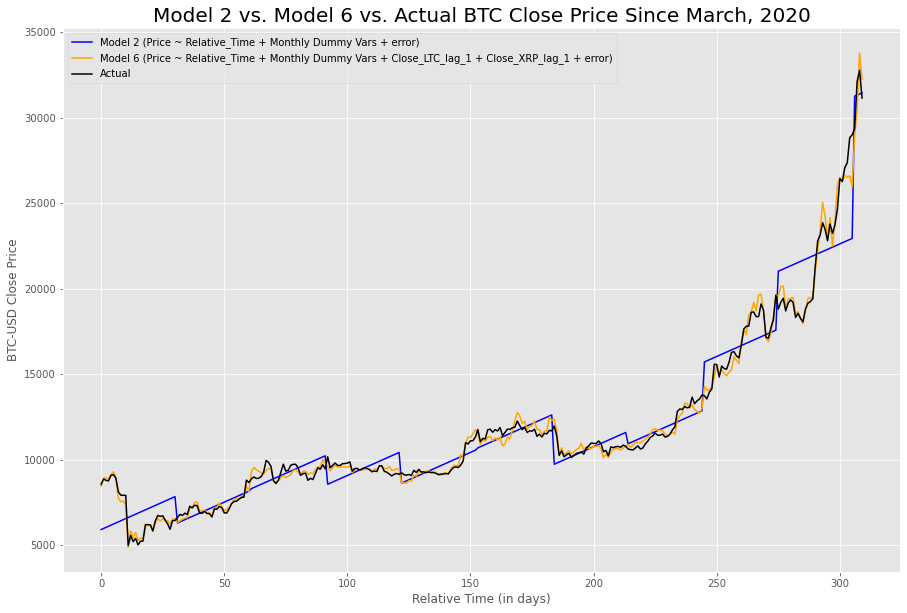

In [207]:
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_baseline_dummies['Relative_Time']
actual = df_btc_baseline['Close']
ax.plot(t, y_pred_2, color = 'blue', label = 'Model 2 (Price ~ Relative_Time + Monthly Dummy Vars + error)')
ax.plot(t, y_pred_4, color = 'orange', label = 'Model 6 (Price ~ Relative_Time + Monthly Dummy Vars + Close_LTC_lag_1 + Close_XRP_lag_1 + error)')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('Model 2 vs. Model 6 vs. Actual BTC Close Price Since March, 2020', fontsize = 20)
ax.set_xlabel('Relative Time (in days)')
ax.set_ylabel('BTC-USD Close Price')
plt.legend()

In [213]:
df_btc_CCC_dummies

Open          High           Low         Close  \
Date                                                                 
2020-03-01   8599.758789   8726.796875   8471.212891   8562.454102   
2020-03-02   8563.264648   8921.308594   8532.630859   8869.669922   
2020-03-03   8865.387695   8901.598633   8704.990234   8787.786133   
2020-03-04   8788.541992   8843.366211   8712.431641   8755.246094   
2020-03-05   8760.285156   9142.054688   8757.253906   9078.762695   
...                  ...           ...           ...           ...   
2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703   
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  30253.234375  33407.519531  28722.755859  31155.914063   

               Adj Close       Volume  Volume_Price   10_Day_VWAP  \
Date                                                                
2020-03-01   8562.454102  35349164300  3.026756e+14   9169.031498   
2020-03-02   8869.669922  42857674408  3.801334e+14   9087.889326   
2020-03-03   8787.786133  42386715820  3.724854e+14   9009.569712   
2020-03-04   8755.246094  34746706368  3.042160e+14   8898.604897   
2020-03-05   9078.762695  39698054597  3.604092e+14   8834.016836   
...                  ...          ...           ...           ...   
2020-12-31  29001.720703  46754964848  1.355974e+15  26107.000561   
2021-01-01  29374.152344  40730301359  1.196418e+15  26595.851844   
2021-01-02  32127.267578  67865420765  2.180331e+15  27692.138243   
2021-01-03  32782.023438  78665235202  2.578806e+15  28741.370170   
2021-01-04  31155.914063  82653560832  2.575147e+15  29384.362439   

            Daily_Return  Biweekly_RS  ...  Sep  Oct  Nov  Dec  Jan  \
Date                                   ...                            
2020-03-01     -0.004309     0.364017  ...    0    0    0    0    0   
2020-03-02      0.035879     0.588065  ...    0    0    0    0    0   
2020-03-03     -0.009232     0.339366  ...    0    0    0    0    0   
2020-03-04     -0.003703     0.436137  ...    0    0    0    0    0   
2020-03-05      0.036951     0.673695  ...    0    0    0    0    0   
...                  ...          ...  ...  ...  ...  ...  ...  ...   
2020-12-31      0.005574     4.344752  ...    0    0    0    0    1   
2021-01-01      0.012842     4.321139  ...    0    0    0    0    0   
2021-01-02      0.093726     5.158336  ...    0    0    0    0    0   
2021-01-03      0.020380     6.980909  ...    0    0    0    0    0   
2021-01-04     -0.049604     5.126168  ...    0    0    0    0    0   

           Close_LTC_lag_1  Close_ETH_lag_1  Close_BNB_lag_1  Close_BCH_lag_1  \
Date                                                                            
2020-03-01       58.543262       219.848511        19.584091       308.326233   
2020-03-02       57.956688       218.970596        18.963232       313.303467   
2020-03-03       60.995548       230.569778        19.814064       336.793274   
2020-03-04       61.144474       224.479630        19.637190       329.238251   
2020-03-05       60.382420       224.517975        19.959188       319.250092   
...                    ...              ...              ...              ...   
2020-12-31      129.466080       751.618958        38.136299       358.808014   
2021-01-01      124.690323       737.803406        37.376034       343.052643   
2021-01-02      126.230347       730.367554        37.905010       341.985657   
2021-01-03      136.944885       774.534973        38.241592       354.599945   
2021-01-04      160.190582       975.507690        41.148979       421.789856   

            Close_XRP_lag_1  
Date                         
2020-03-01         0.231193  
2020-03-02         0.228846  
2020-03-03         0.238747  
2020-03-04         0.234381  
2020-03-05         0.234530  
...                    

In [214]:
#RNN, ARIMA, other time-series models to implement...